Coursera Data Science Capstone Project - Clustering and Exploring neighbourhoods in New York City and Toronto City

Table of Contents:

Download all necessary libraries

Part 1: New York City

Download and Explore Datasets

Pre-processing of data

Explore Neighborhoods in New York City 

Cluster Neighborhoods

Examine Clusters to find similarities

Part 2: Toronto City

Download and Explore Datasets

Pre-processing of data

Explore Neighborhoods in New York City 

Cluster Neighborhoods

Examine Clusters to find similarities

Part 3: Analysis of both cities combined

Combine the datasets for New York and Toronto

Pre-processing of data

Cluster the neighborhoods

Examine Clusters to find similarities


Introduction:
New York City as well as Toronto City are recognised cosmopolitan cities of the world, and as such, they both attract many people who come to visit or to live and work in these cities. I have decided to explore the neighbourhoods of both New York and Toronto to compare the two cities in terms of venues such as restaurants, art galleries, parks, coffee shops, café’s, and so forth as this information will be useful to people who are either looking to visit any of these cities or people that may intend to relocate to one of these cities.


Before getting the data and exploring it, we need to download all the dependencies that we will use:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans


#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from IPython.display import HTML

# Install BeautifulSoup which will be used to scrape the Wikipage
!pip install beautifulsoup4
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen

!pip install lxml

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

Set all the required plotting configurations:

In [2]:
# plotting configurations

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    
    
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid that appears behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

Part One: New York City

Download the New York dataset from the skills lab:

In [4]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


Load the New York data:

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)


All the relevant neighbourhood data for New York is in the features key, so we have to define a new variable containing this data:

In [6]:
ny_neighborhoods_data = newyork_data['features']
ny_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Transform the above data into a pandas dataframe:

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
ny_neighborhoods = pd.DataFrame(columns=column_names)
ny_neighborhoods

# loop through the data and fill the dataframe:

for data in ny_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
ny_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

Check the number of boroughs and neighborhoods in the dataframe:

In [8]:
# ensure that the dataset contains all 5 boroughs and 306 neighbourhoods:

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_neighborhoods['Borough'].unique()),
        ny_neighborhoods.shape[0]))

The dataframe has 5 boroughs and 306 neighborhoods.


Pre-processing of the data:

Find the neighborhoods which share the same name but are located in different boroughs and add the borough name to these neighborhood names for easy differentiation:

In [9]:
# there are neighborhoods that share the same name but are located in different boroughs:
nyc = ny_neighborhoods['Neighborhood'].value_counts()
nyc[nyc > 1]

Bay Terrace    2
Chelsea        2
Murray Hill    2
Sunnyside      2
Name: Neighborhood, dtype: int64

In [10]:
# To resolve the above, for neighborhoods that have the same name but are located in different boroughs, we will add the borough name to the neighborhood name:
for i in range(ny_neighborhoods.shape[0]):
    nyn_ = ny_neighborhoods.loc[i, 'Neighborhood']
    if ny_neighborhoods[ny_neighborhoods['Neighborhood'] == nyn_].shape[0] > 1:
        ind_ = ny_neighborhoods[ny_neighborhoods['Neighborhood'] == nyn_].index.tolist()
        for j in ind_:
            nyb__ = ny_neighborhoods.loc[j, 'Borough']
            ny_neighborhoods.loc[j, 'Neighborhood'] = nyn_ + ', ' + nyb__

ny_neighborhoods[ny_neighborhoods['Neighborhood'].str.startswith('Bay Terrace')]

Borough                Neighborhood   Latitude  Longitude
175         Queens         Bay Terrace, Queens  40.782843 -73.776802
235  Staten Island  Bay Terrace, Staten Island  40.553988 -74.139166

Use geopy library to get the latitude and longitude values of New York City:

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York using latitude and longitude values

In [12]:
map_newyork = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods['Latitude'], 
                                           ny_neighborhoods['Longitude'],
                                           ny_neighborhoods['Borough'], 
                                           ny_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Get the Foursquare credentials:

In [14]:

CLIENT_ID = 'AO5B5LRGZM4T3L2NMQIZEGZPMIGALJD1JQGIXDVNHQMQ04HH'
CLIENT_SECRET = 'BUDCWXAFF3ROO0Q4ZHIDOR2C3HUHKBE11D3HDDJAMZWNPIUT'

VERSION = '20210210'
LIMIT = 100

Obtain the venue results from the Foursquare application:

Use Foursquare to get the nearby venues of the neighborhoods in New York with the given location data.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
ny_venues = getNearbyVenues(names=ny_neighborhoods['Neighborhood'],
                                  latitudes=ny_neighborhoods['Latitude'],
                                  longitudes=ny_neighborhoods['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Remove the venues which are buildings or offices:

In [18]:
ny_venues = ny_venues[~ny_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(ny_venues.shape)
ny_venues.head()

(20173, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                         Venue  Venue Latitude  Venue Longitude  \
0             Lollipops Gelato       40.894123       -73.845892   
1           Ripe Kitchen & Bar       40.898152       -73.838875   
2              Ali's Roti Shop       40.894036       -73.856935   
3  Jackie's West Indian Bakery       40.889283       -73.843310   
4             Carvel Ice Cream       40.890487       -73.848568   

         Venue Category  
0          Dessert Shop  
1  Caribbean Restaurant  
2  Caribbean Restaurant  
3  Caribbean Restaurant  
4        Ice Cream Shop

Group the venues by neighborhoods:

In [19]:
ny_venues.groupby('Neighborhood').size()

Neighborhood
Allerton                       60
Annadale                       15
Arden Heights                  19
Arlington                      17
Arrochar                       26
Arverne                        32
Astoria                       100
Astoria Heights                68
Auburndale                    100
Bath Beach                     98
Battery Park City             100
Bay Ridge                     100
Bay Terrace, Queens            60
Bay Terrace, Staten Island     31
Baychester                     97
Bayside                       100
Bayswater                       9
Bedford Park                   70
Bedford Stuyvesant            100
Beechhurst                     54
Bellaire                       48
Belle Harbor                   24
Bellerose                      50
Belmont                       100
Bensonhurst                   100
Bergen Beach                    9
Blissville                     69
Bloomfield                     27
Boerum Hill                   100
B

Check the number of unique venue categories returned by the Foursquare application:

In [17]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 476 uniques categories.


In [18]:
ny_neighborhoods.shape[0], ny_venues['Neighborhood'].unique().shape[0]

(306, 306)

In [ ]:
Perform one-hot encoding on the venue category variables:

In [19]:
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add the neighborhood column back to the dataframe:
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move the neighborhood column to the first column:
ny_fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[ny_fixed_columns]

ny_onehot.head()

Zoo Exhibit  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0                  0               0                  0   
1            0                  0               0                  0   
2            0                  0               0                  0   
3            0                  0               0                  0   
4            0                  0               0                  0   

   African Restaurant  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Amphitheater  Animal Shelter  Antique Shop  Aquarium  \
0                    0             0               0             0         0   
1                    0             0               0             0         0   
2                    0             0               0             0         0   
3                    0             0               0             0         0   
4                    0             0               0             0         0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0                0            0              0                0          0   
1                0            0              0                0          0   
2                0            0              0                0          0   
3                0            0              0                0          0   
4                0            0              0                0          0   

   Bagel Shop  Baggage Locker  Bakery  Bank  Bar  Baseball Field  \
0           0               0       0     0    0               0   
1           0               0       0     0    0               0   
2           0               0       0     0    0               0   
3           0               0       0     0    0               0   
4           0               0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House  Beach  \
0                 0                 0                   0           0      0   
1                 0                 0                   0           0      0   
2                 0                 0                   0           0      0   
3                 0                 0                   0           0

Group by neighborhood, taking the mean of the frequency of occurrence of each category for each neighborhood:

In [20]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped.head()

Neighborhood  Zoo Exhibit  Accessories Store  Adult Boutique  \
0       Allerton          0.0                0.0             0.0   
1       Annadale          0.0                0.0             0.0   
2  Arden Heights          0.0                0.0             0.0   
3      Arlington          0.0                0.0             0.0   
4       Arrochar          0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant  Airport Lounge  Airport Service  \
0                0.0                 0.0             0.0              0.0   
1                0.0                 0.0             0.0              0.0   
2                0.0                 0.0             0.0              0.0   
3                0.0                 0.0             0.0              0.0   
4                0.0                 0.0             0.0              0.0   

   Airport Terminal  American Restaurant  Amphitheater  Animal Shelter  \
0               0.0             0.016667           0.0             0.0   
1               0.0             0.000000           0.0             0.0   
2               0.0             0.000000           0.0             0.0   
3               0.0             0.000000           0.0             0.0   
4               0.0             0.000000           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0       0.0     0.0               0.0                     0.0   
1           0.0       0.0     0.0               0.0                     0.0   
2           0.0       0.0     0.0               0.0                     0.0   
3           0.0       0.0     0.0               0.0                     0.0   
4           0.0       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  Auditorium  Australian Restaurant  \
0               0.0                 0.0         0.0                    0.0   
1               0.0                 0.0         0.0                    0.0   
2               0.0                 0.0         0.0                    0.0   
3               0.0                 0.0         0.0                    0.0   
4               0.0                 0.0         0.0                    0.0   

   Austrian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                  0.0              0.0          0.0            0.0   
1                  0.0              0.0          0.0            0.0   
2                  0.0              0.0          0.0            0.0   
3                  0.0              0.0          0.0            0.0   
4                  0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Bagel Shop  Baggage Locker    Bakery      Bank  \
0         0.016667        0.0    0.000000             0.0  0.000000  0.016667   
1         0.000000        0.0    0.000000             0.0  0.066667  0.000000   
2         0.000000        0.0    0.052632             0.0  0.000000  0.052632   
3         0.000000        0.0    0.000000             0.0  0.000000  0.000000   
4         0.000000        0.0    0.038462             0.0  0.000000  0.000000   

        Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.033333        0.000000               0.0               0.0   
1  0.066667        0.000000               0.0               0.0   
2  0.000000        0.000000               0.0               0.0   
3  0.000000        0.000000               0.0               0.0   
4  0.000000        0.115385               0.0          

Explore the neighborhoods and venues:

Find the top 5 most common venues per neighborhood:

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ny_neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place            Donut Shop   
1       Annadale            Restaurant           Pizza Place   
2  Arden Heights                  Park    Mexican Restaurant   
3      Arlington         Boat or Ferry        Hardware Store   
4       Arrochar        Baseball Field                 Beach   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0        Sandwich Place   Fried Chicken Joint              Pharmacy  
1                 Trail                 Diner        Cosmetics Shop  
2            Bagel Shop                 Trail                   Spa  
3      Department Store            Donut Shop  Fast Food Restaurant  
4    Italian Restaurant     Polish Restaurant        Cosmetics Shop

Perform kmeans clustering:

In [22]:
# set number of clusters
kclusters = 5

ny_grouped_clustering = ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

ny_merged = ny_neighborhoods

# add clustering labels
ny_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge ny_grouped with ny_neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
ny_merged = ny_merged.join(ny_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ny_merged.head()

Borough Neighborhood   Latitude  Longitude  Cluster Labels  \
0   Bronx    Wakefield  40.894705 -73.847201               3   
1   Bronx   Co-op City  40.874294 -73.829939               3   
2   Bronx  Eastchester  40.887556 -73.827806               3   
3   Bronx    Fieldston  40.895437 -73.905643               2   
4   Bronx    Riverdale  40.890834 -73.912585               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0              Pharmacy           Supermarket  Caribbean Restaurant   
1      Department Store     Mobile Phone Shop           Pizza Place   
2  Caribbean Restaurant                 Diner           Pizza Place   
3                   Bar         Deli / Bodega           Pizza Place   
4                   Bar                  Park           Pizza Place   

  4th Most Common Venue 5th Most Common Venue  
0  Fast Food Restaurant           Pizza Place  
1            Shoe Store         Shopping Mall  
2  Fast Food Restaurant         Shopping Mall  
3                 Plaza    Mexican Restaurant  
4                  Bank    Mexican Restaurant

Create a map of the clusters using Folium:

In [23]:

map_clusters_ny = folium.Map(location=[40.7127281, -74.0060152], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_merged['Latitude'], 
                                  ny_merged['Longitude'], 
                                  ny_merged['Neighborhood'], 
                                  ny_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_ny)
       
map_clusters_ny

Examine the 5 clusters:

Cluster 1: Red cluster

This is the largest cluster and from the top 5 venues, it can be seen that this cluster is quite diverse as the venues are many and varied, with neighborhoods such as Chelsea, Upper East Side, Upper West Side, Tribeca, Soho, Greenwich Village and Brooklyn Heights, to name a few. The most common venues are wide and varied, ranging from coffee shops, Italian and Greek restaurants, bakeries to art galleries, bookstores, parks, scenic trails, beaches, fitness centers and hotels. There is a wide variety of food places such as Italian, Greek, Chinese, Southern, African, Mexican, French, Turkish and Caribbean. This reflects the melting pot of cultures and backgrounds of the residents in these neighborhoods. Coffee shops, cocktails bars and cafe's seem to be the most common venue in this cluster, followed by food venues. This cluster would appeal to tourists, visitors and residents alike as there are many things to do and see in these neighborhoods.

In [24]:
ny_merged.loc[ny_merged['Cluster Labels'] == 0, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood            1st Most Common Venue  \
6                  Marble Hill                             Park   
19                High  Bridge                 Baseball Stadium   
24                 Hunts Point                      Coffee Shop   
46                   Bay Ridge                              Spa   
49                  Greenpoint                      Coffee Shop   
51              Brighton Beach                            Beach   
54                    Flatbush                      Pizza Place   
55               Crown Heights                             Café   
58             Windsor Terrace                    Deli / Bodega   
59            Prospect Heights                              Bar   
61                Williamsburg                      Pizza Place   
62                    Bushwick                              Bar   
63          Bedford Stuyvesant                      Coffee Shop   
64            Brooklyn Heights                             Park   
65                 Cobble Hill                           Bakery   
66             Carroll Gardens                      Coffee Shop   
67                    Red Hook                             Park   
68                     Gowanus                              Bar   
69                 Fort Greene               Italian Restaurant   
70                  Park Slope                      Coffee Shop   
76                 Mill Island                      Pizza Place   
77             Manhattan Beach               Italian Restaurant   
78                Coney Island     Theme Park Ride / Attraction   
84                Clinton Hill               Italian Restaurant   
86                    Downtown                      Coffee Shop   
87                 Boerum Hill                              Bar   
88   Prospect Lefferts Gardens             Caribbean Restaurant   
93         Prospect Park South             Caribbean Restaurant   
95           East Williamsburg                              Bar   
96                  North Side                      Coffee Shop   
97                  South Side                      Pizza Place   
100                  Chinatown               Chinese Restaurant   
101         Washington Heights                      Pizza Place   
102                     Inwood        Latin American Restaurant   
103           Hamilton Heights                      Coffee Shop   
104             Manhattanville                      Coffee Shop   
105             Central Harlem  Southern / Soul Food Restaurant   
106                East Harlem               Mexican Restaurant   
107            Upper East Side                          Exhibit   
108                  Yorkville                      Coffee Shop   
109                 Lenox Hill               Italian Restaurant   
110           Roosevelt Island                             Park   
111            Upper West Side                             Park   
112             Lincoln Square                             Café   
113                    Clinton                          Theater   
114                    Midtown                          Theater   
115     Murray Hill, Manhattan                Korean Restaurant   
116         Chelsea, Manhattan                      Art Gallery   
117          Greenwich Village               Italian Restaurant   
118               East Village                      Pizza Place   
119            Lower East Side               Italian Restaurant   
120                    Tribeca                             Park   
121               Little Italy                             Café   
122                       Soho               Italian Restaurant   
123               West Village               Italian Restaurant   
124           Manhattan Valley                      Coffee Shop   
125        Morningside Heights                      Coffee Shop   
126                   Gramercy                      Coffee Shop   
127          Battery Park City                      Coffee Shop  

Cluster 2: Purple Cluster

This is quite a small cluster comprising mainly of neighborhoods at/near the harbour/marina. The top venues are boat/ferry rides, the harbour/marina and food venues such as fast food restaurants. This venue would be an ideal location for residents working in these neighborhoods or for those wanting to be near the marina.

In [25]:
ny_merged.loc[ny_merged['Cluster Labels'] == 1, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
12    City Island       Harbor / Marina    Seafood Restaurant   
27   Clason Point                  Park  Gym / Fitness Center   
207    Port Ivory         Boat or Ferry           Snack Place   
227     Arlington         Boat or Ferry        Hardware Store   
257  Howland Hook       Harbor / Marina                Lounge   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
12          Boat or Ferry    Italian Restaurant                   Bar  
27         Discount Store                  Pool                   Zoo  
207          Intersection       Harbor / Marina           Fish Market  
227      Department Store            Donut Shop  Fast Food Restaurant  
257                Resort       Border Crossing   Peruvian Restaurant

Cluster 3: Blue Cluster

This is the second largest cluster of neighborhoods in New York. The most common venues appear to be pizza places and Italian restaurants, which may reflect the inhabitants of these neighborhoods. There are also many bars, deli/bodega's, donut shops, restaurants and banks in this cluster. 

In [26]:
ny_merged.loc[ny_merged['Cluster Labels'] == 2, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
3                     Fieldston                   Bar   
4                     Riverdale                   Bar   
5                   Kingsbridge                   Bar   
7                      Woodlawn           Pizza Place   
10                   Baychester        Clothing Store   
11               Pelham Parkway           Pizza Place   
13                 Bedford Park           Pizza Place   
16                      Fordham    Italian Restaurant   
21                   Mott Haven           Pizza Place   
22                  Port Morris        Baseball Field   
28                  Throgs Neck    Italian Restaurant   
29                 Country Club        Sandwich Place   
31           Westchester Square           Pizza Place   
32                     Van Nest           Pizza Place   
33                  Morris Park           Pizza Place   
34                      Belmont    Italian Restaurant   
35               Spuyten Duyvil                  Park   
36              North Riverdale           Pizza Place   
37                   Pelham Bay    Italian Restaurant   
38                Schuylerville    Italian Restaurant   
39               Edgewater Park    Italian Restaurant   
40                  Castle Hill         Deli / Bodega   
47                  Bensonhurst                  Bank   
48                  Sunset Park                Bakery   
50                    Gravesend           Pizza Place   
52               Sheepshead Bay      Sushi Restaurant   
53            Manhattan Terrace           Pizza Place   
57                   Kensington           Pizza Place   
73                Starrett City     Mobile Phone Shop   
79                   Bath Beach           Pizza Place   
80                 Borough Park           Pizza Place   
81                Dyker Heights           Pizza Place   
82              Gerritsen Beach            Donut Shop   
83                  Marine Park        Clothing Store   
91                 Bergen Beach               Stables   
92                      Midwood           Pizza Place   
94                   Georgetown                  Bank   
98                Ocean Parkway      Sushi Restaurant   
99                Fort Hamilton           Pizza Place   
133                Howard Beach    Italian Restaurant   
136                 Kew Gardens           Pizza Place   
137               Richmond Hill     Indian Restaurant   
142                     Maspeth           Pizza Place   
144                    Glendale           Pizza Place   
145                   Rego Park           Pizza Place   
146                   Woodhaven           Pizza Place   
147                  Ozone Park           Pizza Place   
148            South Ozone Park           Pizza Place   
149               College Point            Donut Shop   
150                  Whitestone         Deli / Bodega   
151                     Bayside           Pizza Place   
152                  Auburndale     Korean Restaurant   
153                 Little Neck    Italian Restaurant   
154                  Douglaston    Italian Restaurant   
155                   Glen Oaks     Indian Restaurant   
156                   Bellerose         Deli / Bodega   
157           Kew Gardens Hills           Pizza Place   
158               Fresh Meadows    Chinese Restaurant   
159                   Briarwood            Donut Shop   
161             Oakland Gardens    Chinese Restaurant   
174                  Beechhurst    Italian Restaurant   
175         Bay Terrace, Queens        Clothing Store   
176                    Edgemere           Pizza Place   
181                 Floral Park     Indian Restaurant   
184             Queensboro Hill    Chinese Restaurant   
185                   Hillcrest           Pizza Place   
187                  Lindenwood           Pizza Place   
194                    Bellaire           Pizza Place   
198                New Brighton                   Bar   
199                   Staplet

Cluster 4: Green Cluster

This is a large cluster comprising may neighborhoods, with Caribbean restaurants being the most common venue in this cluster. This is not surpirising as some of the neighborhoods in this cluster are Jamaica Center, South Jamaica and Jamaica Estates. The other popular venues in this cluster are pizza places, grocery stores and fast food restaurants.

In [27]:
ny_merged.loc[ny_merged['Cluster Labels'] == 3, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0              Wakefield              Pharmacy                Supermarket   
1             Co-op City      Department Store          Mobile Phone Shop   
2            Eastchester  Caribbean Restaurant                      Diner   
8                Norwood           Pizza Place                       Bank   
9         Williamsbridge           Pizza Place       Caribbean Restaurant   
14    University Heights         Grocery Store                Pizza Place   
15        Morris Heights         Deli / Bodega              Grocery Store   
17          East Tremont            Donut Shop                Pizza Place   
18            West Farms                  Park                 Donut Shop   
20               Melrose    Mexican Restaurant                 Donut Shop   
23              Longwood  Fast Food Restaurant              Grocery Store   
25            Morrisania  Fast Food Restaurant              Grocery Store   
26             Soundview   Fried Chicken Joint                Supermarket   
30           Parkchester           Pizza Place                 Donut Shop   
41             Olinville           Pizza Place                 Donut Shop   
42        Pelham Gardens            Donut Shop                   Pharmacy   
43             Concourse         Deli / Bodega              Grocery Store   
44             Unionport           Pizza Place              Deli / Bodega   
45              Edenwald           Pizza Place       Caribbean Restaurant   
56         East Flatbush  Caribbean Restaurant             Discount Store   
60           Brownsville        Discount Store                Pizza Place   
71         Cypress Hills  Fast Food Restaurant                Pizza Place   
72         East New York           Pizza Place                Supermarket   
74              Canarsie  Caribbean Restaurant                Pizza Place   
75             Flatlands  Caribbean Restaurant                   Pharmacy   
89            Ocean Hill        Discount Store              Deli / Bodega   
90             City Line           Pizza Place  Latin American Restaurant   
160       Jamaica Center  Caribbean Restaurant                       Bank   
162       Queens Village           Pizza Place                       Bank   
163               Hollis           Pizza Place          Mobile Phone Shop   
164        South Jamaica         Deli / Bodega                Pizza Place   
165           St. Albans  Caribbean Restaurant                Pizza Place   
166             Rochdale              Pharmacy       Fast Food Restaurant   
167  Springfield Gardens         Deli / Bodega                       Park   
168      Cambria Heights              Pharmacy       Caribbean Restaurant   
169             Rosedale  Caribbean Restaurant             Cosmetics Shop   
170         Far Rockaway           Pizza Place         Chinese Restaurant   
182           Holliswood    Chinese Restaurant                       Bank   
183      Jamaica Estates         Deli / Bodega                 Donut Shop   
188            Laurelton  Caribbean Restaurant              Deli / Bodega   
192           Somerville            Donut Shop             Sandwich Place   
193           Brookville         Deli / Bodega       Fast Food Restaurant   
222              Wingate         Deli / Bodega                Pizza Place   
223                Rugby  Caribbean Restaurant                Pizza Place   
259       Remsen Village  Caribbean Restaurant                 Donut Shop   
260             New Lots  Fast Food Restaurant                Pizza Place   
261      Paerdegat Basin  Caribbean Restaurant              Grocery Store   
263        Jamaica Hills      Department Store                 Donut Shop   
267    Claremont Village        Discount Store             Ice Cream Shop   
268    Concourse Village        Sandwich Place                   Pharmacy   
269           Mount Eden         Deli / Bodega                Pizza Place   
270     

Cluster 5: Orange Cluster

This is a small cluster and almost all of these neighborhoods have a beach as the most common venue. This cluster also includes 3 neighborhoods with a baseball field as the most common venue, which sets this cluster apart from the other clusters. Neighborhoods in this cluster would appeal to those who enjoy outdoor activites and the beach. There are also many food venues such as pizza places, fast food joints, Chinese, American, Italian and Polish restaurants, the theater and bars/pubs.

In [28]:
ny_merged.loc[ny_merged['Cluster Labels'] == 4, ny_merged.columns[[1] + list(range(5, ny_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
85         Sea Gate                 Beach              Pharmacy   
171   Broad Channel         Metro Station    Chinese Restaurant   
172    Breezy Point           Pizza Place   American Restaurant   
177         Arverne             Surf Spot                 Beach   
178  Rockaway Beach                 Beach                   Bar   
179        Neponsit                 Beach                   Pub   
190    Belle Harbor                 Beach         Deli / Bodega   
191   Rockaway Park                 Beach           Pizza Place   
204     South Beach                 Beach                  Pier   
228        Arrochar        Baseball Field                 Beach   
232   Midland Beach                 Beach        Baseball Field   
238    Butler Manor        Baseball Field                  Pool   
288         Roxbury        Baseball Field                 Beach   
302         Hammels                 Beach             Surf Spot   

    3rd Most Common Venue    4th Most Common Venue  \
85             Donut Shop                      Spa   
171                  Food      Sporting Goods Shop   
172                 Beach                    Trail   
177         Deli / Bodega               Donut Shop   
178        Ice Cream Shop                 Pharmacy   
179         Deli / Bodega                      Spa   
190                   Pub               Smoke Shop   
191         Deli / Bodega               Donut Shop   
204             Cafeteria                     Food   
228    Italian Restaurant        Polish Restaurant   
232  Fast Food Restaurant            Deli / Bodega   
238         Deli / Bodega  State / Provincial Park   
288               Theater              Art Gallery   
302           Supermarket                      Bar   

             5th Most Common Venue  
85   Paper / Office Supplies Store  
171                    Pizza Place  
172                      Surf Spot  
177           Caribbean Restaurant  
178                  Boat or Ferry  
179                     Restaurant  
190                            Spa  
191                     Bagel Shop  
204                           Park  
228                 Cosmetics Shop  
232                    Pizza Place  
238                  Grocery Store  
288                  National Park  
302                     Donut Shop

Bar plot of the most common venues in New York by venue category:

As can be seen from the bar plot, New Yorkers love eating pizza, and it is by far the most common venue in the city, followed by coffee shops amd Italian restaurants.

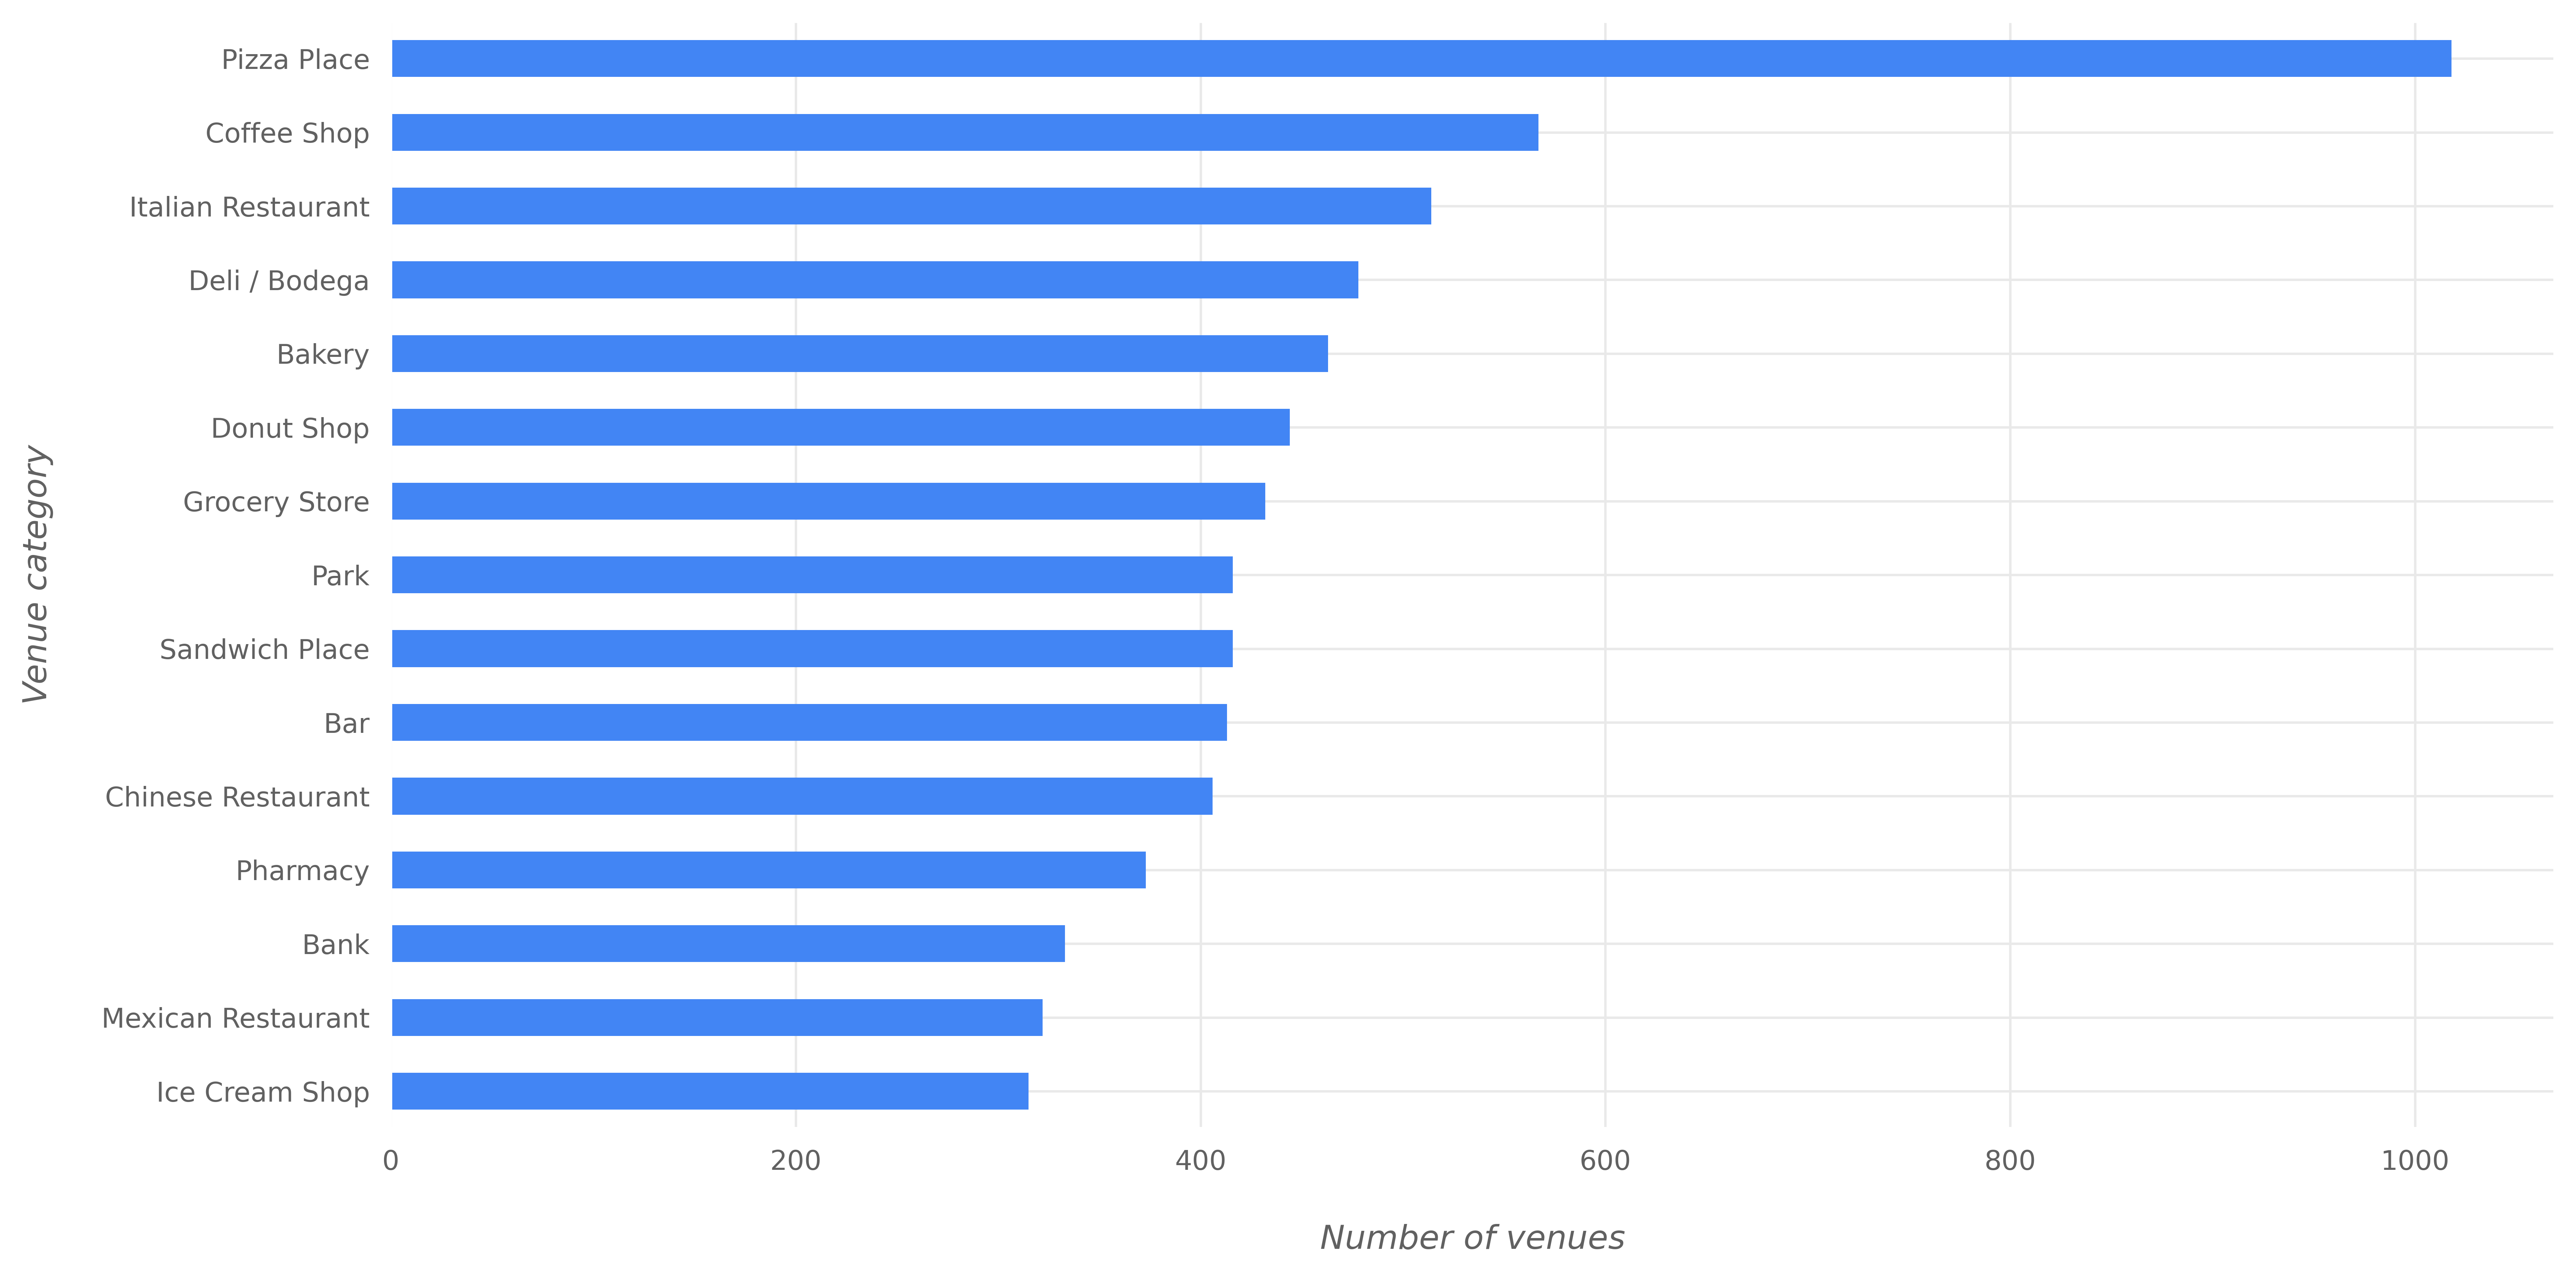

In [20]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ny_top_venues = ny_venues['Venue Category'].value_counts(normalize=False)
ax = ny_top_venues.head(15).plot(kind='barh', color=pc[0]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-nyc.png', dpi=300)

Part 2: Analysis of Toronto:

Get the Toronto data from wikipedia:

In [30]:
# Scrape the data using BeautifulSoup
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table=soup.find_all('table', {"class":'wikitable sortable'})

Convert the data from the wiki page into a table

In [31]:

def tableDataText(table):       
    rows = []
    trs = table.find_all('tr')
    headerow = [td.get_text(strip=True) for td in trs[0].find_all('th')] # header row
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append([td.get_text(strip=True) for td in tr.find_all('td')]) # data row
    return rows

# Create a list using the data from the wiki page
toronto_df=pd.read_html(str(table))
# Convert the list to a dataframe
toronto_df=pd.DataFrame(toronto_df[0])
print(toronto_df.head())

  Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront


Drop the rows where borough = "not assigned" and replace the "not assigned" neighborhood values with the corresponding borough names:

In [32]:

toronto_df.drop(toronto_df.loc[toronto_df['Borough']=="Not assigned"].index, inplace=True)


toronto_df=toronto_df.replace('Not assigned', toronto_df['Borough'])
toronto_df

Postal Code           Borough  \
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
8           M9A         Etobicoke   
9           M1B       Scarborough   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
17          M9B         Etobicoke   
18          M1C       Scarborough   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
26          M9C         Etobicoke   
27          M1E       Scarborough   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
36          M1G       Scarborough   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
107         M9P         Etobicoke   
108         M1R       Scarborough   
109         M2R        North York   
111         M4R   Central Toronto   
112         M5R   Central Toronto   
113         M6R      West Toronto   
114         M7R       Mississauga   
116         M9R         Etobicoke   
117         M1S       Scarborough   
120         M4S   Central Toronto   
121         M5S  Downtown Toronto   
122         M6S      West Toronto   
126         M1T       Scarborough   
129         M4T   Central Toronto   
130         M5T  Downtown Toronto   
135         M1V       Scarborough   
138         M4V   Central Toronto   
139         M5V  Downtown Toronto   
142         M8V         Etobicoke   
143         M9V         Etobicoke   
144         M1W       Scarborough   
147         M4W  Downtown Toronto   
148         M5W  Downtown Toronto   
151         M8W         Etobicoke   
152         M9W         Etobicoke   
153         M1X       Scarborough   
156         M4X  Downtown Toronto   
157         M5X  Downtown Toronto   
160         M8X         Etobicoke   
165         M4Y  Downtown Toronto   
168         M7Y      East Toronto   
169         M8Y         Etobicoke   
178         M8Z         Etobicoke   

                                         Neighbourhood  
2                                            Parkwoods  
3                                     Vic

Check the shape of the data:

In [33]:
toronto_df.shape

(103, 3)

Create a dataframe for the geospatial coordinates of the boroughs:

In [34]:
toronto_df.cood = pd.read_csv("Geospatial_Coordinates.csv")
toronto_df.cood

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.782736 -79.442259
25          M3A  43.753259 -79.329656
26          M3B  43.745906 -79.352188
27          M3C  43.725900 -79.340923
28          M3H  43.754328 -79.442259
29          M3J  43.767980 -79.487262
30          M3K  43.737473 -79.464763
31          M3L  43.739015 -79.506944
32          M3M  43.728496 -79.495697
33          M3N  43.761631 -79.520999
34          M4A  43.725882 -79.315572
35          M4B  43.706397 -79.309937
36          M4C  43.695344 -79.318389
37          M4E  43.676357 -79.293031
38          M4G  43.709060 -79.363452
39          M4H  43.705369 -79.349372
40          M4J  43.685347 -79.338106
41          M4K  43.679557 -79.352188
42          M4L  43.668999 -79.315572
43          M4M  43.659526 -79.340923
44          M4N  43.728020 -79.388790
45          M4P  43.712751 -79.390197
46          M4R  43.715383 -79.405678
47          M4S  43.704324 -79.388790
48          M4T  43.689574 -79.383160
49          M4V  43.686412 -79.400049
50          M4W  43.679563 -79.377529
51          M4X  43.667967 -79.367675
52          M4Y  43.665860 -79.383160
53          M5A  43.654260 -79.360636
54          M5B  43.657162 -79.378937
55          M5C  43.651494 -79.375418
56          M5E  43.644771 -79.373306
57          M5G  43.657952 -79.387383
58          M5H  43.650571 -79.384568
59          M5J  43.640816 -79.381752
60          M5K  43.647177 -79.381576
61          M5L  43.648198 -79.379817
62          M5M  43.733283 -79.419750
63          M5N  43.711695 -79.416936
64          M5P  43.696948 -79.411307
65          M5R  43.672710 -79.405678
66          M5S  43.662696 -79.400049
67          M5T  43.653206 -79.400049
68          M5V  43.628947 -79.394420
69          M5W  43.646435 -79.374846
70          M5X  43.648429 -79.382280
71          M6A  43.718518 -79.464763
72          M6B  43.709577 -79.445073
73          M6C  43.693781 -79.428191
74          M6E  43.689026 -79.453512
75          M6G  43.669542 -79.422564
76          M6H  43.669005 -79.442259
77          M6J  43.647927 -79.419750
78          M6K  43.636847 -79.428191
79          M6L  43.713756 -79.490074
80          M6M  43.691116 -79.476013
81          M6N  43.673185 -79.487262
82          M6P  43.661608 -79.464763
83          M6R  43.648960 -79.456325
84          M6S  43.651571 -79.484450
85          M7A  43.662301 -79.389494
86          M7R  43.636966 -79.615819
87          M7Y  43.662744 -79.321558
88          M8V  43.605647 -79.501321
89          M8W  43.602414 -79.543484
90          M8X  43.653654 -79.506944
91          M8Y  43.636258 -79.498509
92          M8Z  43.628841 -79.520999
93          M9A  43.667856 -79.532242
94          M9B  43.650943 -79.554724
95          M9C  43.643515 -79.577201
96          M9L  43.756303 -79.565963
97          M9M  43.724766 -79.532242
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

Create a dataframe containing the Postal Code, Borough, Neighbourhood, Latititude & Longitude in 1 dataframe

In [35]:
t_df_merged = pd.merge(toronto_df, toronto_df.cood, on='Postal Code', how='left')
t_df_merged

Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
26          M1H       Scarborough   
27          M2H        North York   
28          M3H        North York   
29          M4H         East York   
30          M5H  Downtown Toronto   
31          M6H      West Toronto   
32          M1J       Scarborough   
33          M2J        North York   
34          M3J        North York   
35          M4J         East York   
36          M5J  Downtown Toronto   
37          M6J      West Toronto   
38          M1K       Scarborough   
39          M2K        North York   
40          M3K        North York   
41          M4K      East Toronto   
42          M5K  Downtown Toronto   
43          M6K      West Toronto   
44          M1L       Scarborough   
45          M2L        North York   
46          M3L        North York   
47          M4L      East Toronto   
48          M5L  Downtown Toronto   
49          M6L        North York   
50          M9L        North York   
51          M1M       Scarborough   
52          M2M        North York   
53          M3M        North York   
54          M4M      East Toronto   
55          M5M        North York   
56          M6M              York   
57          M9M        North York   
58          M1N       Scarborough   
59          M2N        North York   
60          M3N        North York   
61          M4N   Central Toronto   
62          M5N   Central Toronto   
63          M6N              York   
64          M9N              York   
65          M1P       Scarborough   
66          M2P        North York   
67          M4P   Central Toronto   
68          M5P   Central Toronto   
69          M6P      West Toronto   
70          M9P         Etobicoke   
71          M1R       Scarborough   
72          M2R        North York   
73          M4R   Central Toronto   
74          M5R   Central Toronto   
75          M6R      West Toronto   
76          M7R       Mississauga   
77          M9R         Etobicoke   
78          M1S       Scarborough   
79          M4S   Central Toronto   
80          M5S  Downtown Toronto   
81          M6S      West Toronto   
82          M1T       Scarborough   
83          M4T   Central Toronto   
84          M5T  Downtown Toronto   
85          M1V       Scarborough   
86          M4V   Central Toronto   
87          M5V  Downtown Toronto   
88          M8V         Etobicoke   
89          M9V         Etobicoke   
90          M1W       Scarborough   
91          M4W  Downtown Toronto   
92          M5W  Downtown Toronto   
93          M8W         Etobicoke   
94          M9W         Etobicoke   
95          M1X       Scarborough   
96          M4X  Downtown Toronto   
97          M5X  Downtown Toronto   
98          M8X         Etobicoke   
99          M4Y  Downtown Toronto   
100         M7Y      East Toronto   
101         M8Y         Etobicoke   
102         M8Z         Etobicoke   

                                         Neighbourhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656

Rename the column Neigbourhood to Neighborhood (as the venues data from Foursquare has a column Neighborhood)

In [36]:
t_df_merged = t_df_merged.rename(columns={'Neighbourhood': 'Neighborhood'})
t_df_merged.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

Check the number of boroughs and neighborhoods:

In [37]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(t_df_merged['Borough'].unique()),
        t_df_merged.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


Use Geopy to get the latitude & longitude coordinates for Toronto:

In [38]:
# Get the latitude & longitude for Toronto using the geolocator:
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Create a map of Toronto using the above latitude and longitude values:

In [39]:
map_toronto = folium.Map(location=[43.6534817, -79.3839347], zoom_start=11)

# add markers to map
for lat, lng, borough, neighbourhood in zip(t_df_merged['Latitude'], 
                                           t_df_merged['Longitude'],
                                           t_df_merged['Borough'], 
                                           t_df_merged['Neighborhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Create a dataframe for the venues generated by the Foursuqare application for Toronto:

In [40]:
# Create a dataframe for the venues
toronto_venues = getNearbyVenues(names=t_df_merged['Neighborhood'],
                                  latitudes=t_df_merged['Latitude'],
                                  longitudes=t_df_merged['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

Check the shape of the data:

In [41]:
print(toronto_venues.shape)
toronto_venues.head()

(4906, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.753259              -79.329656   
1    Parkwoods              43.753259              -79.329656   
2    Parkwoods              43.753259              -79.329656   
3    Parkwoods              43.753259              -79.329656   
4    Parkwoods              43.753259              -79.329656   

               Venue  Venue Latitude  Venue Longitude        Venue Category  
0    Allwyn's Bakery       43.759840       -79.324719  Caribbean Restaurant  
1    Brookbanks Park       43.751976       -79.332140                  Park  
2        Tim Hortons       43.760668       -79.326368                  Café  
3                A&W       43.760643       -79.326865  Fast Food Restaurant  
4  Bruno's valu-mart       43.746143       -79.324630         Grocery Store

Remove the venues which are buildings or offices:

In [42]:
toronto_venues = toronto_venues[~toronto_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(toronto_venues.shape)
toronto_venues.head()

(4878, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods              43.753259              -79.329656   
1    Parkwoods              43.753259              -79.329656   
2    Parkwoods              43.753259              -79.329656   
3    Parkwoods              43.753259              -79.329656   
4    Parkwoods              43.753259              -79.329656   

               Venue  Venue Latitude  Venue Longitude        Venue Category  
0    Allwyn's Bakery       43.759840       -79.324719  Caribbean Restaurant  
1    Brookbanks Park       43.751976       -79.332140                  Park  
2        Tim Hortons       43.760668       -79.326368                  Café  
3                A&W       43.760643       -79.326865  Fast Food Restaurant  
4  Bruno's valu-mart       43.746143       -79.324630         Grocery Store

Group the venues by neighborhood:

In [43]:
toronto_venues.groupby('Neighborhood').size()

Neighborhood
Agincourt                                                                                                                                  44
Alderwood, Long Branch                                                                                                                     24
Bathurst Manor, Wilson Heights, Downsview North                                                                                            32
Bayview Village                                                                                                                            15
Bedford Park, Lawrence Manor East                                                                                                          40
Berczy Park                                                                                                                               100
Birch Cliff, Cliffside West                                                                                                            

Check the shape of the data:

In [44]:
t_df_merged.shape[0], toronto_venues['Neighborhood'].unique().shape[0]

(103, 98)

Find the number of unique categories of the venues:

In [47]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 326 uniques categories.


Perform one-hot encoding on the dataframe:

In [48]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
t_fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[t_fixed_columns]

toronto_onehot.head()

Zoo  ATM  Accessories Store  Afghan Restaurant  African Restaurant  \
0    0    0                  0                  0                   0   
1    0    0                  0                  0                   0   
2    0    0                  0                  0                   0   
3    0    0                  0                  0                   0   
4    0    0                  0                  0                   0   

   Airport  Airport Lounge  American Restaurant  Amphitheater  Animal Shelter  \
0        0               0                    0             0               0   
1        0               0                    0             0               0   
2        0               0                    0             0               0   
3        0               0                    0             0               0   
4        0               0                    0             0               0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   
3             0         0            0           0                    0   
4             0         0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Garage  \
0                 0                   0                0            0   
1                 0                   0                0            0   
2                 0                   0                0            0   
3                 0                   0                0            0   
4                 0                   0                0            0   

   Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  Badminton Court  \
0              0                0          0           0                0   
1              0                0          0           0                0   
2              0                0          0           0                0   
3              0                0          0           0                0   
4              0                0          0           0                0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Stadium  Beach  Beach Bar  Beer Bar  Beer Store  \
0                   0      0          0         0           0   
1                   0      0          0         0           0   
2                   0      0          0         0           0   
3                   0      0          0         0           0   
4                   0      0          0         0           0   

   Belgian Restaurant  Bike Shop  Bistro  Bookstore  Botanical Garden  \
0                   0          0       0          0                 0   
1                   0          0       0          0                 0   
2                   0          0       0          0                 0   
3                   0          0       0          0                 0   
4                   0          0       0          0                 0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               0        0   

   Bridal 

Group by neighborhood and take the mean of the frequency of occurrence of each category for each neighborhood:

In [49]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood   Zoo       ATM  \
0                                           Agincourt  0.00  0.000000   
1                              Alderwood, Long Branch  0.00  0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North  0.00  0.000000   
3                                     Bayview Village  0.00  0.000000   
4                   Bedford Park, Lawrence Manor East  0.00  0.000000   
5                                         Berczy Park  0.00  0.000000   
6                         Birch Cliff, Cliffside West  0.00  0.000000   
7        Brockton, Parkdale Village, Exhibition Place  0.00  0.000000   
8   Business reply mail Processing Centre, South C...  0.00  0.000000   
9   CN Tower, King and Spadina, Railway Lands, Har...  0.00  0.000000   
10                                Caledonia-Fairbanks  0.00  0.050000   
11              Canada Post Gateway Processing Centre  0.00  0.000000   
12                                          Cedarbrae  0.00  0.000000   
13                                 Central Bay Street  0.00  0.000000   
14                                           Christie  0.00  0.000000   
15                               Church and Wellesley  0.00  0.000000   
16            Clarks Corners, Tam O'Shanter, Sullivan  0.00  0.000000   
17    Cliffside, Cliffcrest, Scarborough Village West  0.00  0.000000   
18                     Commerce Court, Victoria Hotel  0.00  0.000000   
19                                         Davisville  0.00  0.000000   
20                                   Davisville North  0.00  0.000000   
21   Del Ray, Mount Dennis, Keelsdale and Silverthorn  0.00  0.000000   
22                                          Don Mills  0.00  0.000000   
23  Dorset Park, Wexford Heights, Scarborough Town...  0.00  0.000000   
24                                          Downsview  0.00  0.000000   
25                       Dufferin, Dovercourt Village  0.00  0.000000   
26      East Toronto, Broadview North (Old East York)  0.00  0.000000   
27  Eringate, Bloordale Gardens, Old Burnhamthorpe...  0.00  0.000000   
28                       Fairview, Henry Farm, Oriole  0.00  0.000000   
29             First Canadian Place, Underground city  0.00  0.000000   
30    Forest Hill North & West, Forest Hill Road Park  0.00  0.000000   
31                           Garden District, Ryerson  0.00  0.000000   
32                                          Glencairn  0.00  0.000000   
33                    Golden Mile, Clairlea, Oakridge  0.00  0.000000   
34                  Guildwood, Morningside, West Hill  0.00  0.000000   
35  Harbourfront East, Union Station, Toronto Islands  0.00  0.000000   
36                      High Park, The Junction South  0.00  0.000000   
37                                  Hillcrest Village  0.00  0.000000   
38                                      Humber Summit  0.00  0.000000   
39                                   Humberlea, Emery  0.00  0.000000   
40                                 Humewood-Cedarvale  0.00  0.000000   
41                     India Bazaar, The Beaches West  0.00  0.000000   
42            Islington Avenue, Humber Valley Village  0.00  0.000000   
43        Kennedy Park, Ionview, East Birchmount Park  0.00  0.000000   
44          Kensington Market, Chinatown, Grange Park  0.00  0.000000   
45  Kingsview Village, St. Phillips, Martin Grove ...  0.00  0.000000   
46                   Lawrence Manor, Lawrence Heights  0.00  0.000000   
47                                      Lawrence Park  0.00  0.000000   
48                                            Leaside  0.00  0.000000   
49                           Little Portugal, Trinity  0.00  0.000000   
50                                     Malvern, Rouge  0.00  0.000000   
51  Milliken, Agincourt North, Steeles East, L'Amo...  0.00  0.000000   
52  Mimico NW, The Queensway West, South of Bloor,...  0.00  0.000000   
53                        Moore Park, Summerhill East  0.00  0.000000   
54       New Toronto, Mimi

Explore the neighborhoods and venues:

Find the top 5 venues per neighborhood:

In [50]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

toronto_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt    Chinese Restaurant   
1                           Alderwood, Long Branch        Discount Store   
2  Bathurst Manor, Wilson Heights, Downsview North           Pizza Place   
3                                  Bayview Village   Japanese Restaurant   
4                Bedford Park, Lawrence Manor East    Italian Restaurant   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Bakery         Shopping Mall  Caribbean Restaurant   
1           Pizza Place                  Park   Moroccan Restaurant   
2                  Park           Coffee Shop                  Bank   
3                  Bank           Gas Station         Grocery Store   
4           Coffee Shop  Fast Food Restaurant        Sandwich Place   

  5th Most Common Venue  
0           Pizza Place  
1          Intersection  
2              Pharmacy  
3                 Trail  
4                  Bank

Perform kmeans clustering on the dataframe:

In [51]:
# set number of clusters:
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)


# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 3, 4, 4, 0, 4, 4, 4], dtype=int32)

In [52]:
# add clustering labels
toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Merge the dataframe containing the borough, neighborhood and geopgraphical coordinates with the venues dataframe:

In [53]:
toronto_merged = t_df_merged.join(toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how ='inner')
toronto_merged.head()

Postal Code           Borough                                 Neighborhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0  43.753259 -79.329656               0                  Park   
1  43.725882 -79.315572               4           Coffee Shop   
2  43.654260 -79.360636               4           Coffee Shop   
3  43.718518 -79.464763               3        Clothing Store   
4  43.662301 -79.389494               4           Coffee Shop   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                Pharmacy         Shopping Mall           Pizza Place   
1                    Park                Lounge          Hockey Arena   
2              Restaurant                  Café               Theater   
3  Furniture / Home Store           Coffee Shop            Restaurant   
4        Sushi Restaurant                  Park                  Café   

  5th Most Common Venue  
0         Grocery Store  
1   Sporting Goods Shop  
2                  Park  
3  Fast Food Restaurant  
4      Ramen Restaurant

Create a map of the clusters using Folium:

In [54]:
# create map
toronto_map_clusters = folium.Map(location=[43.6534817, -79.3839347], zoom_start=11)

# set color scheme for the clusters
kclusters = 5
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'],
                                  toronto_merged['Longitude'], 
                                  toronto_merged['Neighborhood'],
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

Examine the clusters

Cluster 1: Red Cluster

This is a small cluster comprising of various venues with the most common venues being the park and food venues such as pizza places, Italian, Chinese, Easter European and Caribbean restaurants. There are also a number of shopping malls, ice skating rinks and pharmacies in this cluster. This venues in this cluster are what you would expect of a metropolitan city, however the number of parks were pleasantly surprising as many cities have very limited numbers of parks. 

In [55]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
0                                            Parkwoods               0   
5              Islington Avenue, Humber Valley Village               0   
11   West Deane Park, Princess Gardens, Martin Grov...               0   
12              Rouge Hill, Port Union, Highland Creek               0   
16                                  Humewood-Cedarvale               0   
21                                 Caledonia-Fairbanks               0   
22                                              Woburn               0   
27                                   Hillcrest Village               0   
50                                       Humber Summit               0   
51     Cliffside, Cliffcrest, Scarborough Village West               0   
57                                    Humberlea, Emery               0   
58                         Birch Cliff, Cliffside West               0   
64                                              Weston               0   
66                                     York Mills West               0   
72                         Willowdale, Willowdale West               0   
88        New Toronto, Mimico South, Humber Bay Shores               0   
89   South Steeles, Silverstone, Humbergate, Jamest...               0   
93                              Alderwood, Long Branch               0   
101  Old Mill South, King's Mill Park, Sunnylea, Hu...               0   

    1st Most Common Venue 2nd Most Common Venue        3rd Most Common Venue  \
0                    Park              Pharmacy                Shopping Mall   
5                Pharmacy                  Café                         Bank   
11            Pizza Place                  Park                        Hotel   
12     Italian Restaurant        Breakfast Spot                         Park   
16                   Park           Pizza Place            Convenience Store   
21               Pharmacy                  Park                  Pizza Place   
22                   Park           Coffee Shop           Chinese Restaurant   
27               Pharmacy           Coffee Shop                         Park   
50      Electronics Store    Italian Restaurant                     Pharmacy   
51            Pizza Place                 Beach               Ice Cream Shop   
57      Convenience Store      Storage Facility                       Bakery   
58                   Park     Convenience Store                   Restaurant   
64          Train Station        Sandwich Place                     Pharmacy   
66             Restaurant                  Park                 Tennis Court   
72               Pharmacy     Convenience Store                      Butcher   
88                   Park            Restaurant         Fast Food Restaurant   
89            Pizza Place         Grocery Store         Caribbean Restaurant   
93         Discount Store           Pizza Place                         Park   
101                  Park    Italian Restaurant  Eastern European Restaurant   

    4th Most Common Venue 5th Most Common Venue  
0             Pizza Place         Grocery Store  
5             Golf Course         Shopping Mall  
11                   Bank     Fish & Chips Shop  
12             Playground          Burger Joint  
16            Coffee Shop                 Field  
21         Cosmetics Shop                  Bank  
22               Pharmacy     Mobile Phone Shop  
27      Convenience Store          Intersection  
50                   Bank         Shopping Mall  
51             Sports Bar            Restaurant  
57                   Park        Discount Store  
58                   Café          Skating Rink  
64    Fried Chicken Joint          Skating Rink  
66          Bowling Alley                   Gym  
72             Baby Store         Grocery Store  
88          Grocery Store          Dessert Shop  
89         Discount Store        Sandwich Place  
93    Moroccan Restaurant          Intersection  
101       

Cluster 2: Purple Cluster

We will ignore this cluster as it contains only 1 neighborhood. 

In [56]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
45  York Mills, Silver Hills               1                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
45                  Pool           Yoga Studio        Farmers Market   

          5th Most Common Venue  
45  Eastern European Restaurant

Cluster 3: Blue Cluster

We will ignore this cluster as it contains only 1 neighborhood. 

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels 1st Most Common Venue  \
94  Northwest, West Humber - Clairville               2                 Hotel   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
94           Coffee Shop               Dog Run     Electronics Store   

   5th Most Common Venue  
94     Elementary School

Cluster 4: Green cluster

This is the second largest cluster for Toronto. There are many different venues in the 5 most common venues. Coffee shops are the most common venue, followed by food venues such as pizza places, followed by fast food restaurants, Chinese, Vietnamese and Korean restaurants. This cluster also contains a brewery, soccer stadium, bowling alley, gastropub and a few parks. It is a diverse cluster and would appeal to a large number of people, both residents and tourists alike. 

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
3                    Lawrence Manor, Lawrence Heights               3   
6                                      Malvern, Rouge               3   
8                     Parkview Hill, Woodbine Gardens               3   
10                                          Glencairn               3   
18                  Guildwood, Morningside, West Hill               3   
23                                            Leaside               3   
26                                          Cedarbrae               3   
28    Bathurst Manor, Wilson Heights, Downsview North               3   
29                                   Thorncliffe Park               3   
32                                Scarborough Village               3   
33                       Fairview, Henry Farm, Oriole               3   
34                    Northwood Park, York University               3   
38        Kennedy Park, Ionview, East Birchmount Park               3   
39                                    Bayview Village               3   
40                                          Downsview               3   
46                                          Downsview               3   
53                                          Downsview               3   
60                                          Downsview               3   
44                    Golden Mile, Clairlea, Oakridge               3   
49           North Park, Maple Leaf Park, Upwood Park               3   
56   Del Ray, Mount Dennis, Keelsdale and Silverthorn               3   
59                        Willowdale, Willowdale East               3   
63                      Runnymede, The Junction North               3   
65  Dorset Park, Wexford Heights, Scarborough Town...               3   
70                                          Westmount               3   
71                                  Wexford, Maryvale               3   
77  Kingsview Village, St. Phillips, Martin Grove ...               3   
78                                          Agincourt               3   
82            Clarks Corners, Tam O'Shanter, Sullivan               3   
85  Milliken, Agincourt North, Steeles East, L'Amo...               3   
90                      Steeles West, L'Amoreaux West               3   

     1st Most Common Venue      2nd Most Common Venue   3rd Most Common Venue  \
3           Clothing Store     Furniture / Home Store             Coffee Shop   
6              Coffee Shop                 Restaurant    Fast Food Restaurant   
8              Pizza Place                    Brewery          Soccer Stadium   
10           Grocery Store                Pizza Place      Italian Restaurant   
18             Pizza Place       Fast Food Restaurant                    Bank   
23             Coffee Shop        Sporting Goods Shop  Furniture / Home Store   
26                  Bakery                       Bank             Coffee Shop   
28             Pizza Place                       Park             Coffee Shop   
29             Coffee Shop          Indian Restaurant           Grocery Store   
32          Ice Cream Shop              Bowling Alley            Intersection   
33          Clothing Store                Coffee Shop          Sandwich Place   
34             Coffee Shop                Pizza Place  Furniture / Home Store   
38      Chinese Restaurant             Discount Store             Coffee Shop   
39     Japanese Restaurant                       Bank             Gas Station   
40             Coffee Shop      Vietnamese Restaurant                   Hotel   
46             Coffee Shop      Vietnamese Restaurant                   Hotel   
53             Coffee Shop      Vietnamese Restaurant                   Hotel   
60             Coffee Shop      Vietnamese Restaurant                   Hotel   
44       Convenience Store                Coffee Shop            Intersection   
49             Coffee Shop          Convenience Store            Intersection   
56 

Cluster 5: Orange Cluster

This is the largest cluster of neighbourhoods in Toronto and this cluster includes some of the trendiest neighbourhoods such as Yorkville, Chinatown, Kensington Market and The Annex. Much like New Yorks trendiest neighbourhoods, this clusters venues are wide and varied, ranging from coffee shops, cafe's, restaurants, pubs and bars to a hockey arena, hotels, the theater, spas, parks and gyms. This cluster would appeal to tourists and also to those wanting to live in a trendy, hip neighbourhood. 

In [59]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  Cluster Labels  \
1                                     Victoria Village               4   
2                            Regent Park, Harbourfront               4   
4          Queen's Park, Ontario Provincial Government               4   
7                                            Don Mills               4   
13                                           Don Mills               4   
9                             Garden District, Ryerson               4   
14                                    Woodbine Heights               4   
15                                      St. James Town               4   
17   Eringate, Bloordale Gardens, Old Burnhamthorpe...               4   
19                                         The Beaches               4   
20                                         Berczy Park               4   
24                                  Central Bay Street               4   
25                                            Christie               4   
30                            Richmond, Adelaide, King               4   
31                        Dufferin, Dovercourt Village               4   
35       East Toronto, Broadview North (Old East York)               4   
36   Harbourfront East, Union Station, Toronto Islands               4   
37                            Little Portugal, Trinity               4   
41                        The Danforth West, Riverdale               4   
42            Toronto Dominion Centre, Design Exchange               4   
43        Brockton, Parkdale Village, Exhibition Place               4   
47                      India Bazaar, The Beaches West               4   
48                      Commerce Court, Victoria Hotel               4   
52                             Willowdale, Newtonbrook               4   
54                                     Studio District               4   
55                   Bedford Park, Lawrence Manor East               4   
61                                       Lawrence Park               4   
62                                            Roselawn               4   
67                                    Davisville North               4   
68     Forest Hill North & West, Forest Hill Road Park               4   
69                       High Park, The Junction South               4   
73                   North Toronto West, Lawrence Park               4   
74                 The Annex, North Midtown, Yorkville               4   
75                              Parkdale, Roncesvalles               4   
76               Canada Post Gateway Processing Centre               4   
79                                          Davisville               4   
80                      University of Toronto, Harbord               4   
81                                  Runnymede, Swansea               4   
83                         Moore Park, Summerhill East               4   
84           Kensington Market, Chinatown, Grange Park               4   
86   Summerhill West, Rathnelly, South Hill, Forest...               4   
87   CN Tower, King and Spadina, Railway Lands, Har...               4   
91                                            Rosedale               4   
92                                      Stn A PO Boxes               4   
96                         St. James Town, Cabbagetown               4   
97              First Canadian Place, Underground city               4   
98       The Kingsway, Montgomery Road, Old Mill North               4   
99                                Church and Wellesley               4   
100  Business reply mail Processing Centre, South C...               4   
102  Mimico NW, The Queensway West, South of Bloor,...               4   

    1st Most Common Venue          2nd Most Common Venue  \
1             Coffee Shop                           Park   
2             Coffee Shop                     Restaurant   
4             Coffee Shop               Sushi Restaurant   
7              Restaurant  

Bar plot of the most common venues in Toronto by venue category:

As can be seen from the bar graph, Torontoans really do enjoy coffee shops, as it appears to be the most common venue in Toronto City, followed by cafe's and parks. Unlike New York, Toronto appears to have many parks and the residents use them on a regular basis, which is somewhat surprising when one considers the weather in Toronto as compared to the weather in New York. 

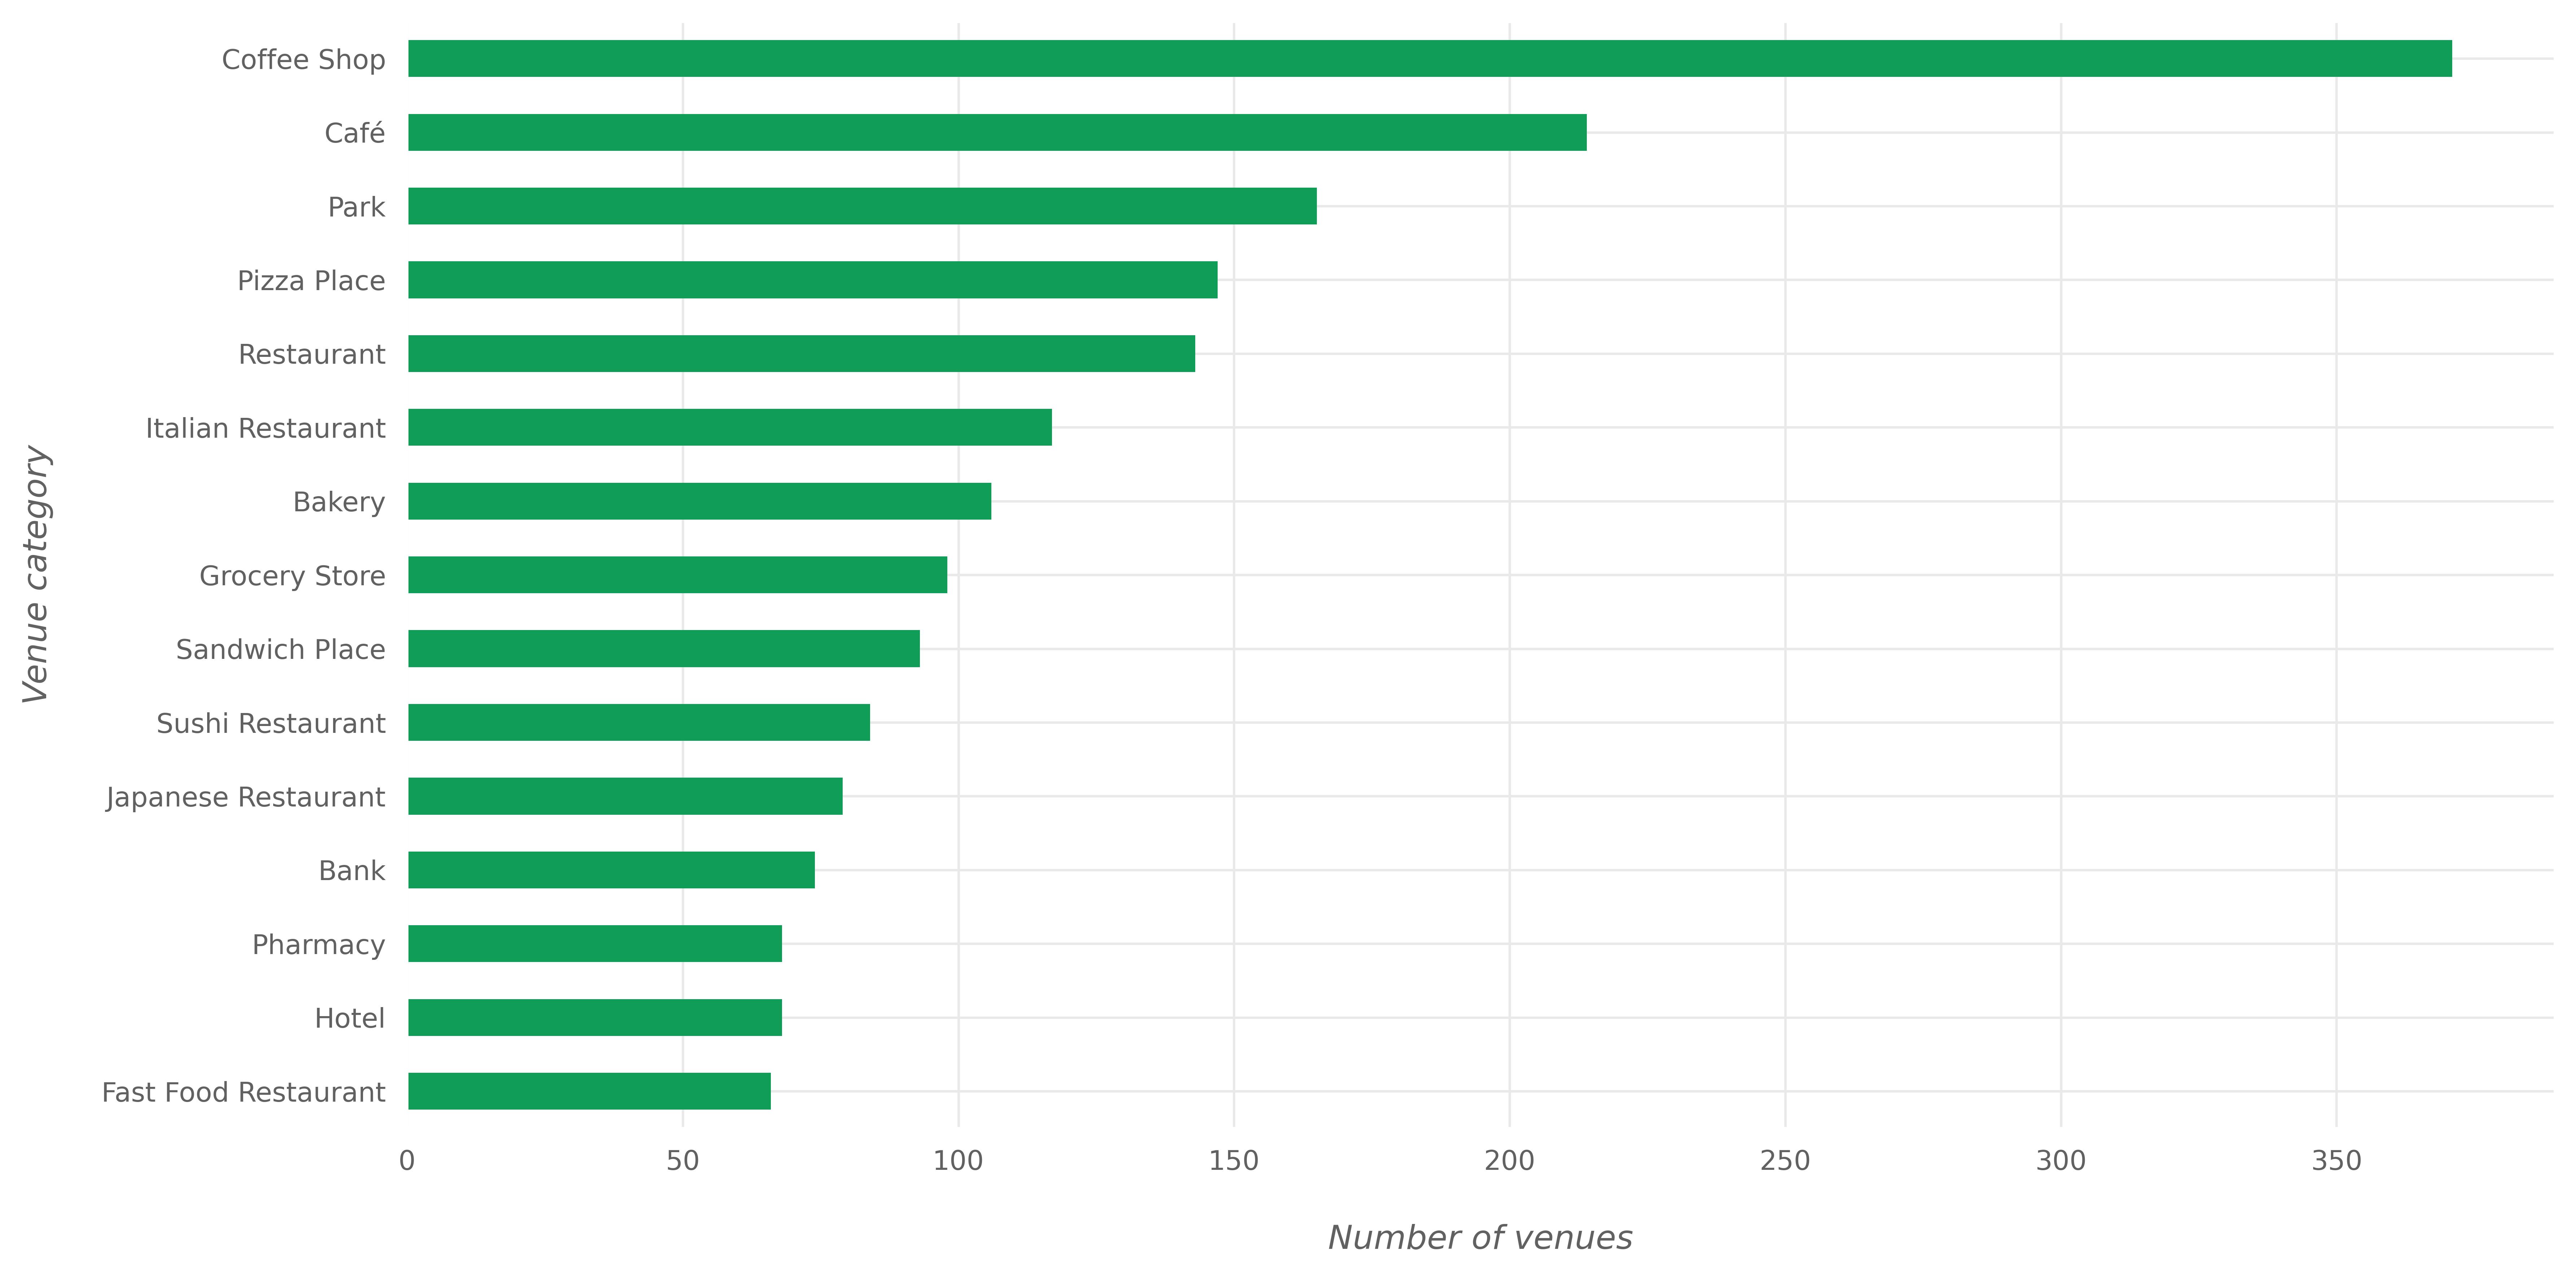

In [60]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
toronto_top_venues = toronto_venues['Venue Category'].value_counts(normalize=False)
ax = toronto_top_venues.head(15).plot(kind='barh', color=pc[3]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-tor.png', dpi=300)

Part 3: Analysis of both Toronto and New York neighborhoods combined:

In [61]:
columns_ny_only = set(ny_grouped.columns).difference(set(toronto_grouped.columns))
columns_toronto_only = set(toronto_grouped.columns).difference(set(ny_grouped.columns))

Combine the New York and Toronto datasets:

In [62]:
ny_grouped_ = ny_grouped.copy()
ny_grouped_['Neighborhood'] = ny_grouped_['Neighborhood'].apply(lambda x: x + '_NYC')
toronto_grouped_ = toronto_grouped.copy()
toronto_grouped_['Neighborhood'] = toronto_grouped_['Neighborhood'].apply(lambda x: x + '_Toronto')

for c in columns_toronto_only:
    ny_grouped_[c] = 0
for c in columns_ny_only:
    toronto_grouped_[c] = 0
    
all_columns_sorted = ['Neighborhood'] + sorted(list(ny_grouped_.drop('Neighborhood', axis=1).columns), key=str.lower)
ny_grouped_ = ny_grouped_[all_columns_sorted]
toronto_grouped_ = toronto_grouped_[all_columns_sorted]
    
ny_toronto_grouped = pd.concat([ny_grouped_, toronto_grouped_]).reset_index(drop=True)

In [63]:
ny_toronto_grouped.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0       Allerton_NYC                0.0             0.0                0.0   
1       Annadale_NYC                0.0             0.0                0.0   
2  Arden Heights_NYC                0.0             0.0                0.0   
3      Arlington_NYC                0.0             0.0                0.0   
4       Arrochar_NYC                0.0             0.0                0.0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                 0.0      0.0             0.0              0.0   
1                 0.0      0.0             0.0              0.0   
2                 0.0      0.0             0.0              0.0   
3                 0.0      0.0             0.0              0.0   
4                 0.0      0.0             0.0              0.0   

   Airport Terminal  American Restaurant  Amphitheater  Animal Shelter  \
0               0.0             0.016667           0.0             0.0   
1               0.0             0.000000           0.0             0.0   
2               0.0             0.000000           0.0             0.0   
3               0.0             0.000000           0.0             0.0   
4               0.0             0.000000           0.0             0.0   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  \
0           0.0       0.0     0.0               0.0                     0.0   
1           0.0       0.0     0.0               0.0                     0.0   
2           0.0       0.0     0.0               0.0                     0.0   
3           0.0       0.0     0.0               0.0                     0.0   
4           0.0       0.0     0.0               0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0          0.0         0.0                  0.0                   0.0   
1          0.0         0.0                  0.0                   0.0   
2          0.0         0.0                  0.0                   0.0   
3          0.0         0.0                  0.0                   0.0   
4          0.0         0.0                  0.0                   0.0   

   Asian Restaurant  Athletics & Sports  ATM  Auditorium  \
0               0.0                 0.0  0.0         0.0   
1               0.0                 0.0  0.0         0.0   
2               0.0                 0.0  0.0         0.0   
3               0.0                 0.0  0.0         0.0   
4               0.0                 0.0  0.0         0.0   

   Australian Restaurant  Austrian Restaurant  Auto Dealership  Auto Garage  \
0                    0.0                  0.0              0.0          0.0   
1                    0.0                  0.0              0.0          0.0   
2                    0.0                  0.0              0.0          0.0   
3                    0.0                  0.0              0.0          0.0   
4                    0.0                  0.0              0.0          0.0   

   Auto Workshop  Automotive Shop  Baby Store  Badminton Court  Bagel Shop  \
0            0.0         0.016667         0.0              0.0    0.000000   
1            0.0         0.000000         0.0              0.0    0.000000   
2            0.0         0.000000         0.0              0.0    0.052632   
3            0.0         0.000000         0.0              0.0    0.000000   
4            0.0         0.000000         0.0              0.0    0.038462   

   Baggage Locker    Bakery      Bank       Bar  Baseball Field  \
0             0.0  0.000000  0.016667  0.033333        0.000000   
1             0.0  0.066667  0.000000  0.066667        0.000000   
2             0.0  0.000000  0.052632  0.000000        0.000000   
3             0.0  0.000000  0.000000  0.000000        0.000000   
4             0.0  0.000000  0.000000  0.000000        0.115385   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bath House

Check the shape of the resulting dataframe:

In [64]:
ny_toronto_grouped.shape

(404, 509)

Most popular venue categories for each neighborhood:

In [65]:
# obtaining the most popular categories for each neighborhood
ny_toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ny_toronto_neighborhoods_venues_sorted['Neighborhood'] = ny_toronto_grouped['Neighborhood']

for ind in np.arange(ny_toronto_grouped.shape[0]):
    ny_toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(
        ny_toronto_grouped.iloc[ind, :], num_top_venues)

ny_toronto_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton_NYC           Pizza Place            Donut Shop   
1       Annadale_NYC           Pizza Place                 Trail   
2  Arden Heights_NYC                  Park    Mexican Restaurant   
3      Arlington_NYC         Boat or Ferry        Hardware Store   
4       Arrochar_NYC        Baseball Field    Italian Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0  Fast Food Restaurant              Pharmacy   Fried Chicken Joint  
1            Restaurant                   Bar                 Diner  
2    Italian Restaurant        Sandwich Place      Sushi Restaurant  
3           Snack Place          Intersection            Donut Shop  
4                 Beach         Deli / Bodega            Taco Place

Bar plot of the most common venue categories for both New York and Toronto:

The bar graph below shows that the most common venues for both New York and Toronto are pizza places, followed by coffee shops and Italian restaurants. Due to the larger size of New York in comparison to Toronto, it can be seen that New York neighborhood venues account for more of the venues in the graph when compared to Toronto, as the pizza places and Italian restaurants appeared to be one of the 3 most common venues for New York City, whereas the coffee shops was the most common venue for Toronto City.

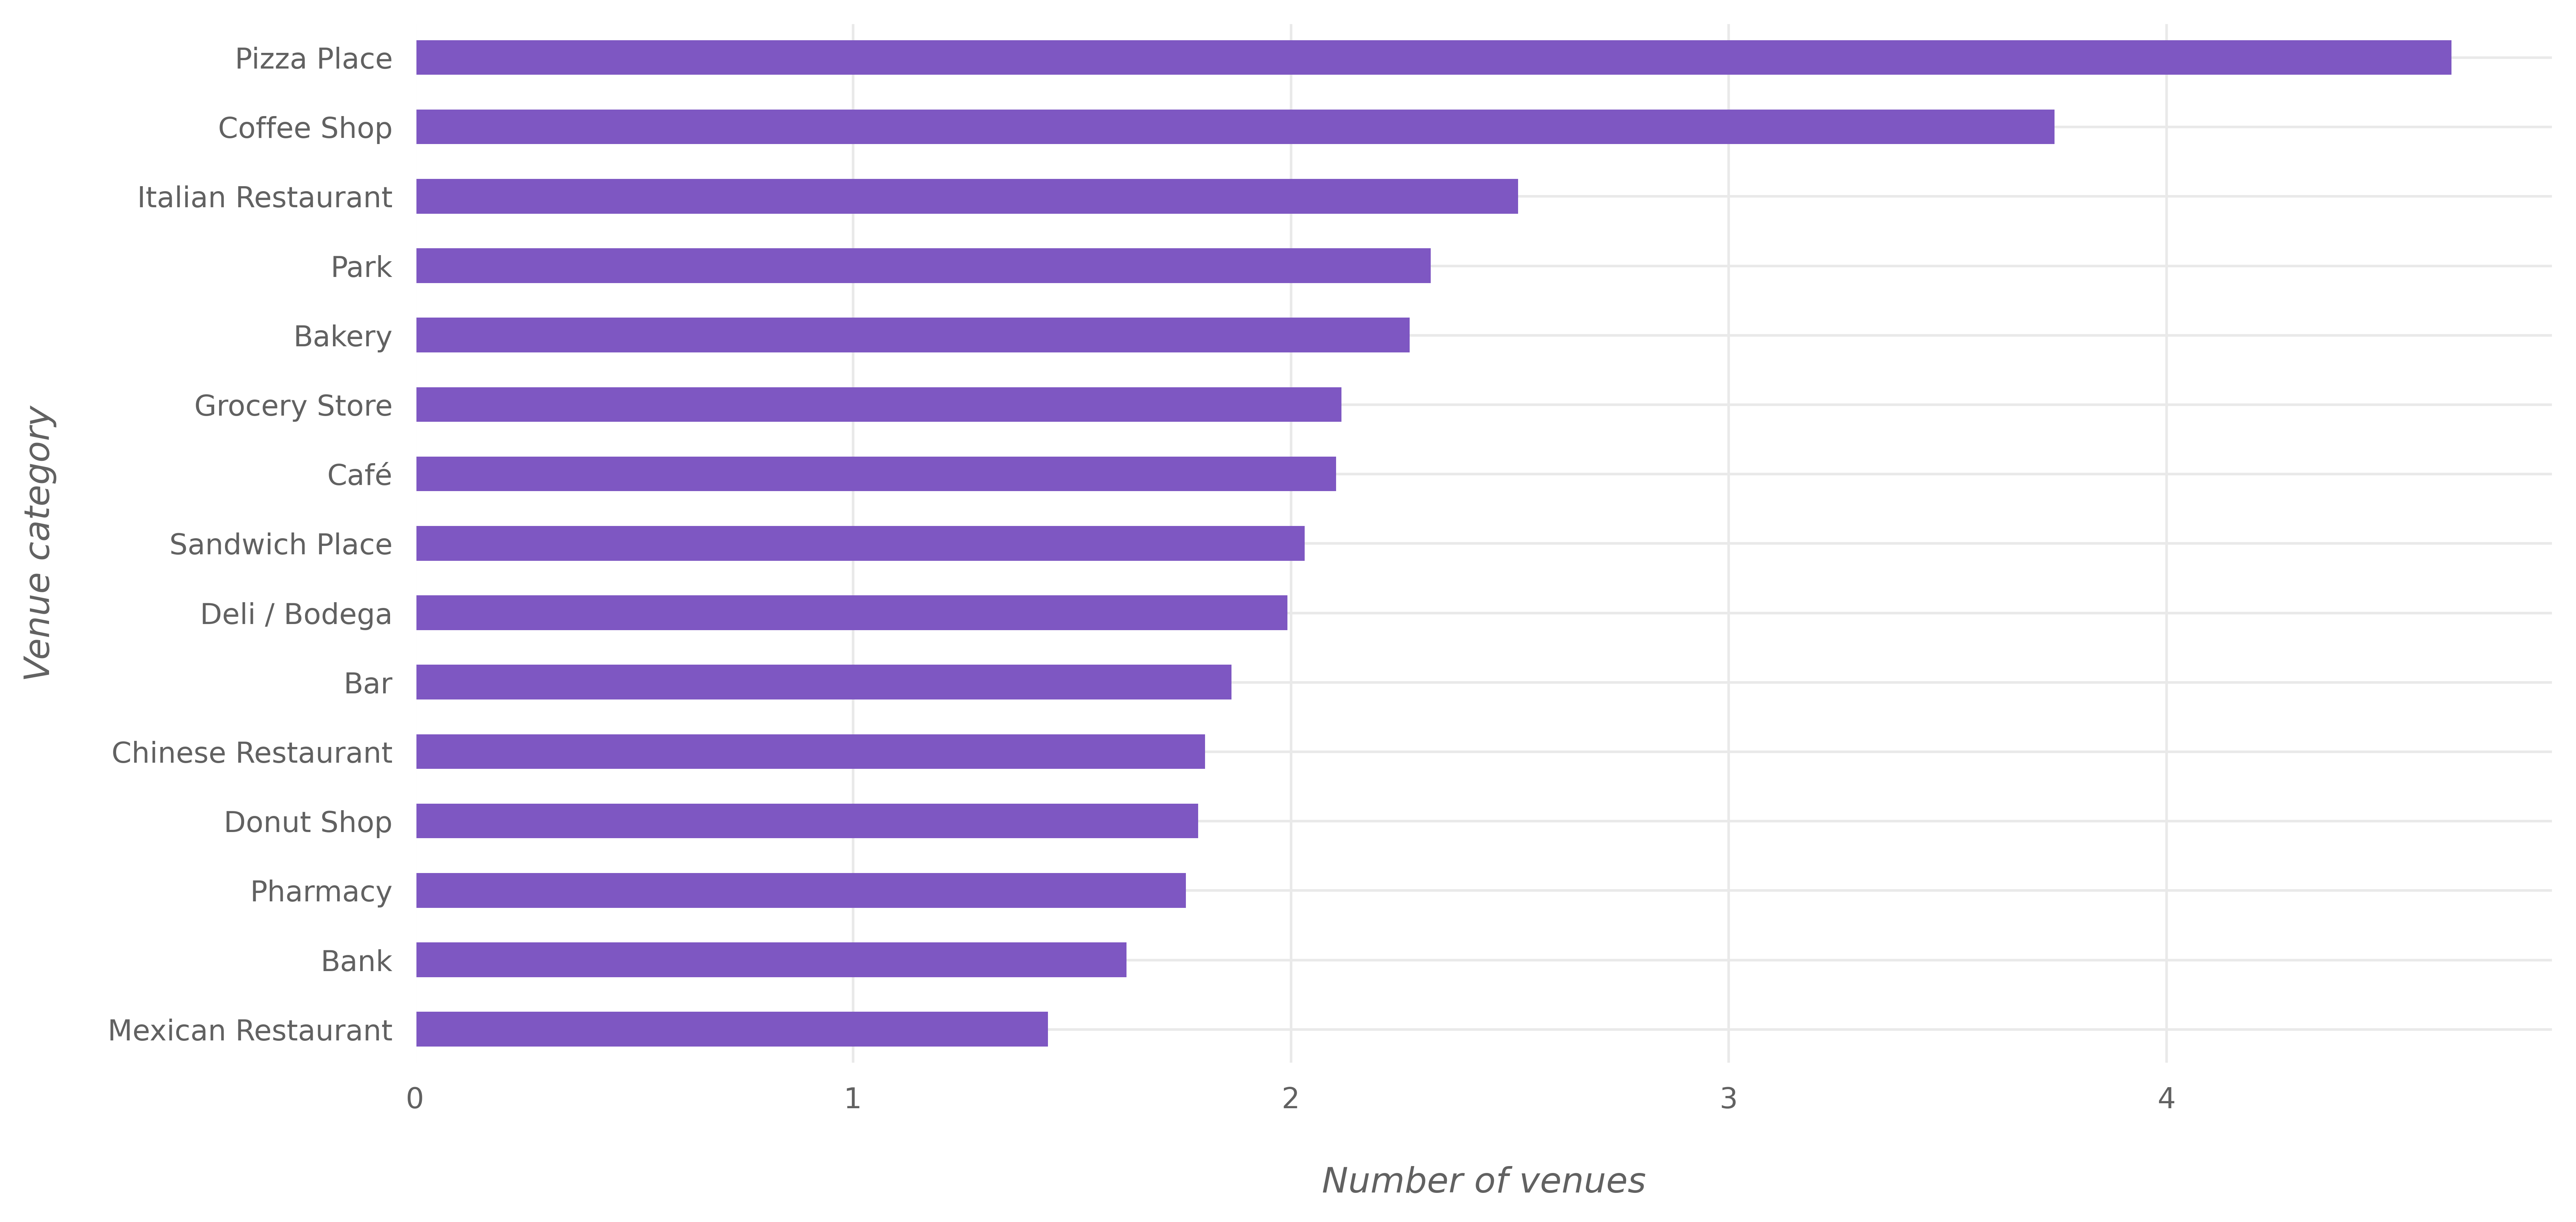

In [66]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ny_toronto_top_venues = pd.concat([ny_venues, toronto_venues])['Venue Category'].value_counts(normalize=True) * 100
ax = ny_toronto_top_venues.head(15).plot(kind='barh', color=pc[12]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
fig.savefig('most-common-ven-ny-tor.png', dpi=300)

Perform kmeans clustering:

In [67]:
# the number of clusters
kclusters = 5

ny_toronto_grouped_clustering = ny_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 1, 4, 2, 4, 4, 1, 1], dtype=int32)

In [68]:
# add clustering labels
ny_toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ny_toronto_merged = ny_toronto_neighborhoods_venues_sorted.set_index('Neighborhood')

ny_toronto_merged.iloc[300:310]

Cluster Labels  \
Neighborhood                                                         
Wingate_NYC                                                      1   
Woodhaven_NYC                                                    1   
Woodlawn_NYC                                                     1   
Woodrow_NYC                                                      1   
Woodside_NYC                                                     4   
Yorkville_NYC                                                    4   
Agincourt_Toronto                                                1   
Alderwood, Long Branch_Toronto                                   1   
Bathurst Manor, Wilson Heights, Downsview North...               1   
Bayview Village_Toronto                                          0   

                                                   1st Most Common Venue  \
Neighborhood                                                               
Wingate_NYC                                                Deli / Bodega   
Woodhaven_NYC                                                Pizza Place   
Woodlawn_NYC                                                         Pub   
Woodrow_NYC                                                     Pharmacy   
Woodside_NYC                                           Indian Restaurant   
Yorkville_NYC                                                Coffee Shop   
Agincourt_Toronto                                     Chinese Restaurant   
Alderwood, Long Branch_Toronto                            Discount Store   
Bathurst Manor, Wilson Heights, Downsview North...                  Bank   
Bayview Village_Toronto                                      Gas Station   

                                                        2nd Most Common Venue  \
Neighborhood                                                                    
Wingate_NYC                                                     Grocery Store   
Woodhaven_NYC                                       Latin American Restaurant   
Woodlawn_NYC                                                      Pizza Place   
Woodrow_NYC                                                     Grocery Store   
Woodside_NYC                                                           Bakery   
Yorkville_NYC                                                             Gym   
Agincourt_Toronto                                              Sandwich Place   
Alderwood, Long Branch_Toronto                                    Pizza Place   
Bathurst Manor, Wilson Heights, Downsview North...                   Pharmacy   
Bayview Village_Toronto                                   Japanese Restaurant   

                                                   3rd Most Common Venue  \
Neighborhood                                                               
Wingate_NYC                                                  Pizza Place   
Woodhaven_NYC                                              Deli / Bodega   
Woodlawn_NYC                                                         Bar   
Woodrow_NYC                                                    Juice Bar   
Woodside_NYC                                               Grocery Store   
Yorkville_NYC                                         Italian Restaurant   
Agincourt_Toronto                                            Pizza Place   
Alderwood, Long Branch_Toronto                                      Park   
Bathurst Manor, Wilson Heights, Downsview North...           Coffee Shop   
Bayview Village_Toronto                                             Bank   

                                                   4th Most Common Venue  \
Neighborhood                                                               
Wingate_NYC                                                   Donut Shop   
Woodhaven_NYC                                                   Pharmacy   
Woodlawn_NYC                                               Deli / Bodega   
Woodrow_NYC                     

Examine the clusters

Cluster 1:

This cluster comprises of a large number of neighbourhoods. The bulk of these appear to from Toronto. The most common venues in this cluster are coffee shops, followed by cafe's and parks. There are also bars, hotels, gyms, a few memorial sites, theatres, a concert hall and shopping malls. The food venues cover a wide range, such as Italian, Chinese, Japanese, Thai, Vietnamese, Middle-Eastern, Mediterranean and Indian restaurants. The neighbourhoods in these clusters would be suitable for those wanting to live in a city wanting to be close to a wide range of venues. 

In [69]:
c1 = ny_toronto_merged.loc[ny_toronto_merged['Cluster Labels'] == 0, :]
c1

Cluster Labels  \
Neighborhood                                                         
Arden Heights_NYC                                                0   
Battery Park City_NYC                                            0   
Financial District_NYC                                           0   
Hunts Point_NYC                                                  0   
Long Island City_NYC                                             0   
Queensbridge_NYC                                                 0   
Bayview Village_Toronto                                          0   
Bedford Park, Lawrence Manor East_Toronto                        0   
Berczy Park_Toronto                                              0   
Birch Cliff, Cliffside West_Toronto                              0   
CN Tower, King and Spadina, Railway Lands, Harb...               0   
Canada Post Gateway Processing Centre_Toronto                    0   
Central Bay Street_Toronto                                       0   
Church and Wellesley_Toronto                                     0   
Commerce Court, Victoria Hotel_Toronto                           0   
Davisville_Toronto                                               0   
Davisville North_Toronto                                         0   
Don Mills_Toronto                                                0   
Dorset Park, Wexford Heights, Scarborough Town ...               0   
Downsview_Toronto                                                0   
Dufferin, Dovercourt Village_Toronto                             0   
East Toronto, Broadview North (Old East York)_T...               0   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...               0   
Fairview, Henry Farm, Oriole_Toronto                             0   
First Canadian Place, Underground city_Toronto                   0   
Forest Hill North & West, Forest Hill Road Park...               0   
Garden District, Ryerson_Toronto                                 0   
Golden Mile, Clairlea, Oakridge_Toronto                          0   
Harbourfront East, Union Station, Toronto Islan...               0   
Hillcrest Village_Toronto                                        0   
Humewood-Cedarvale_Toronto                                       0   
Lawrence Manor, Lawrence Heights_Toronto                         0   
Lawrence Park_Toronto                                            0   
Leaside_Toronto                                                  0   
Malvern, Rouge_Toronto                                           0   
Moore Park, Summerhill East_Toronto                              0   
North Park, Maple Leaf Park, Upwood Park_Toronto                 0   
North Toronto West, Lawrence Park_Toronto                        0   
Northwest, West Humber - Clairville_Toronto                      0   
Northwood Park, York University_Toronto                          0   
Queen's Park, Ontario Provincial Government_Tor...               0   
Regent Park, Harbourfront_Toronto                                0   
Richmond, Adelaide, King_Toronto                                 0   
Rosedale_Toronto                                                 0   
Roselawn_Toronto                                                 0   
Runnymede, Swansea_Toronto                                       0   
Runnymede, The Junction North_Toronto                            0   
Scarborough Village_Toronto                                      0   
St. James Town_Toronto                                           0   
St. James Town, Cabbagetown_Toronto                              0   
Stn A PO Boxes_Toronto                                           0   
Summerhill West, Rathnelly, South Hill, Forest ...               0   
The Kingsway, Montgomery Road, Old Mill North_T...               0   
Thorncliffe Park_Toronto                                         0   
Toronto Dominion Centre, Design Exchange_Toronto                 0   
Victoria Village_Toronto                                      

Cluster 2:

This is a very large cluster of neighbourhoods in both New York and Toronto. The bulk of the neighbourhoods in this cluster are from New York. The most common venues are pizza places, followed by donut shops and pharmacies. There are also many stores such as hardware, mobile phones, cosmetics, womens' clothing, discount stores, shopping malls  and department stores. This cluster contains trails, parks, baseball fields, skate parks, golf courses and plagrounds as activity-based venues. 

In [70]:
c2 = ny_toronto_merged.loc[ny_toronto_merged['Cluster Labels'] == 1, :]
c2

Cluster Labels  \
Neighborhood                                                         
Allerton_NYC                                                     1   
Annadale_NYC                                                     1   
Arlington_NYC                                                    1   
Auburndale_NYC                                                   1   
Bath Beach_NYC                                                   1   
Bay Terrace, Queens_NYC                                          1   
Bay Terrace, Staten Island_NYC                                   1   
Baychester_NYC                                                   1   
Bayswater_NYC                                                    1   
Bedford Park_NYC                                                 1   
Beechhurst_NYC                                                   1   
Bellaire_NYC                                                     1   
Bellerose_NYC                                                    1   
Bensonhurst_NYC                                                  1   
Bergen Beach_NYC                                                 1   
Blissville_NYC                                                   1   
Borough Park_NYC                                                 1   
Briarwood_NYC                                                    1   
Broad Channel_NYC                                                1   
Broadway Junction_NYC                                            1   
Bronxdale_NYC                                                    1   
Brookville_NYC                                                   1   
Brownsville_NYC                                                  1   
Bulls Head_NYC                                                   1   
Butler Manor_NYC                                                 1   
Cambria Heights_NYC                                              1   
Canarsie_NYC                                                     1   
Castle Hill_NYC                                                  1   
Castleton Corners_NYC                                            1   
City Line_NYC                                                    1   
Claremont Village_NYC                                            1   
Clifton_NYC                                                      1   
Co-op City_NYC                                                   1   
College Point_NYC                                                1   
Concord_NYC                                                      1   
Concourse_NYC                                                    1   
Concourse Village_NYC                                            1   
Country Club_NYC                                                 1   
Cypress Hills_NYC                                                1   
Dongan Hills_NYC                                                 1   
Douglaston_NYC                                                   1   
Dyker Heights_NYC                                                1   
East Elmhurst_NYC                                                1   
East Flatbush_NYC                                                1   
East New York_NYC                                                1   
East Tremont_NYC                                                 1   
Eastchester_NYC                                                  1   
Edenwald_NYC                                                     1   
Edgemere_NYC                                                     1   
Edgewater Park_NYC                                               1   
Elm Park_NYC                                                     1   
Eltingville_NYC                                                  1   
Erasmus_NYC                                                      1   
Far Rockaway_NYC                                                 1   
Flatlands_NYC                                                    1   
Floral Park_NYC                                               

Cluster 3:

This cluster contains neighbourhoods in New York and Toronto that have a beach and the most common venue is the beach, followed by food venues. There are many ourdoor venues such as surf spots, parks, trails, skate parks, soccer fields and baseball fields and would be ideal for those wanting to visit or reside close to venues such as these and still be in the city. 

In [71]:
c3 = ny_toronto_merged.loc[ny_toronto_merged['Cluster Labels'] == 2, :]
c3

Cluster Labels  \
Neighborhood                                                         
Arverne_NYC                                                      2   
Belle Harbor_NYC                                                 2   
Breezy Point_NYC                                                 2   
Hammels_NYC                                                      2   
Neponsit_NYC                                                     2   
Rockaway Beach_NYC                                               2   
Rockaway Park_NYC                                                2   
Roxbury_NYC                                                      2   
Sea Gate_NYC                                                     2   
South Beach_NYC                                                  2   
Cliffside, Cliffcrest, Scarborough Village West...               2   

                                                   1st Most Common Venue  \
Neighborhood                                                               
Arverne_NYC                                                    Surf Spot   
Belle Harbor_NYC                                                   Beach   
Breezy Point_NYC                                               Surf Spot   
Hammels_NYC                                                        Beach   
Neponsit_NYC                                                       Beach   
Rockaway Beach_NYC                                                 Beach   
Rockaway Park_NYC                                                  Beach   
Roxbury_NYC                                               Baseball Field   
Sea Gate_NYC                                                       Beach   
South Beach_NYC                                                    Beach   
Cliffside, Cliffcrest, Scarborough Village West...           Pizza Place   

                                                   2nd Most Common Venue  \
Neighborhood                                                               
Arverne_NYC                                                        Beach   
Belle Harbor_NYC                                           Deli / Bodega   
Breezy Point_NYC                                     American Restaurant   
Hammels_NYC                                                    Surf Spot   
Neponsit_NYC                                                         Pub   
Rockaway Beach_NYC                                                   Bar   
Rockaway Park_NYC                                            Pizza Place   
Roxbury_NYC                                                        Beach   
Sea Gate_NYC                                                    Pharmacy   
South Beach_NYC                                                     Pier   
Cliffside, Cliffcrest, Scarborough Village West...        Ice Cream Shop   

                                                   3rd Most Common Venue  \
Neighborhood                                                               
Arverne_NYC                                                Deli / Bodega   
Belle Harbor_NYC                                                     Pub   
Breezy Point_NYC                                             Pizza Place   
Hammels_NYC                                                  Supermarket   
Neponsit_NYC                                                         Spa   
Rockaway Beach_NYC                                        Ice Cream Shop   
Rockaway Park_NYC                                          Deli / Bodega   
Roxbury_NYC                                                      Theater   
Sea Gate_NYC                                                  Donut Shop   
South Beach_NYC                                               Skate Park   
Cliffside, Cliffcrest, Scarborough Village West...                 Beach   

                                                   4th Most Common Venue  \
Neighborhood                                                               
Arverne_NYC           

Cluster 4:

This is a very small cluster and will be ignored.

In [72]:
c4 = ny_toronto_merged.loc[ny_toronto_merged['Cluster Labels'] == 3, :]
c4

Cluster Labels  \
Neighborhood                                                         
Clason Point_NYC                                                 3   
Old Mill South, King's Mill Park, Sunnylea, Hum...               3   
York Mills, Silver Hills_Toronto                                 3   

                                                   1st Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                                    Park   
Old Mill South, King's Mill Park, Sunnylea, Hum...                  Park   
York Mills, Silver Hills_Toronto                                    Park   

                                                   2nd Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                                    Pool   
Old Mill South, King's Mill Park, Sunnylea, Hum...        Ice Cream Shop   
York Mills, Silver Hills_Toronto                                    Pool   

                                                   3rd Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                          Discount Store   
Old Mill South, King's Mill Park, Sunnylea, Hum...    Italian Restaurant   
York Mills, Silver Hills_Toronto                             Zoo Exhibit   

                                                   4th Most Common Venue  \
Neighborhood                                                               
Clason Point_NYC                                    Gym / Fitness Center   
Old Mill South, King's Mill Park, Sunnylea, Hum...         Shopping Mall   
York Mills, Silver Hills_Toronto                           Event Service   

                                                   5th Most Common Venue  
Neighborhood                                                              
Clason Point_NYC                                       Fish & Chips Shop  
Old Mill South, King's Mill Park, Sunnylea, Hum...  Gym / Fitness Center  
York Mills, Silver Hills_Toronto                                 Exhibit

Cluster 5:

This cluster contains the trendiest neighbourhoods for both New York and Toronto. It is a large cluster comprising of many neighbourhoods and a wide variety of common venues such as baseball fields, beaches, parks, zoo, arcades, bookstores, gyms, coffee shops, art galleries, a theme park, jazz clubs, golf courses, mountains, marina's and many other venues. This cluster would appeal to tourists and residents who enjoy a wide variety of interests and being in a trendy district.

In [73]:
c5 = ny_toronto_merged.loc[ny_toronto_merged['Cluster Labels'] == 4, :]
c5

Cluster Labels  \
Neighborhood                                                         
Arrochar_NYC                                                     4   
Astoria_NYC                                                      4   
Astoria Heights_NYC                                              4   
Bay Ridge_NYC                                                    4   
Bayside_NYC                                                      4   
Bedford Stuyvesant_NYC                                           4   
Belmont_NYC                                                      4   
Bloomfield_NYC                                                   4   
Boerum Hill_NYC                                                  4   
Brighton Beach_NYC                                               4   
Brooklyn Heights_NYC                                             4   
Bushwick_NYC                                                     4   
Carnegie Hill_NYC                                                4   
Carroll Gardens_NYC                                              4   
Central Harlem_NYC                                               4   
Charleston_NYC                                                   4   
Chelsea, Manhattan_NYC                                           4   
Chelsea, Staten Island_NYC                                       4   
Chinatown_NYC                                                    4   
City Island_NYC                                                  4   
Civic Center_NYC                                                 4   
Clinton_NYC                                                      4   
Clinton Hill_NYC                                                 4   
Cobble Hill_NYC                                                  4   
Coney Island_NYC                                                 4   
Corona_NYC                                                       4   
Crown Heights_NYC                                                4   
Ditmas Park_NYC                                                  4   
Downtown_NYC                                                     4   
Dumbo_NYC                                                        4   
East Harlem_NYC                                                  4   
East Village_NYC                                                 4   
East Williamsburg_NYC                                            4   
Egbertville_NYC                                                  4   
Elmhurst_NYC                                                     4   
Emerson Hill_NYC                                                 4   
Fieldston_NYC                                                    4   
Flatbush_NYC                                                     4   
Flatiron_NYC                                                     4   
Forest Hills_NYC                                                 4   
Forest Hills Gardens_NYC                                         4   
Fort Greene_NYC                                                  4   
Fort Hamilton_NYC                                                4   
Fulton Ferry_NYC                                                 4   
Gowanus_NYC                                                      4   
Gramercy_NYC                                                     4   
Grant City_NYC                                                   4   
Greenpoint_NYC                                                   4   
Greenwich Village_NYC                                            4   
Hamilton Heights_NYC                                             4   
High  Bridge_NYC                                                 4   
Howland Hook_NYC                                                 4   
Hudson Yards_NYC                                                 4   
Hunters Point_NYC                                                4   
Inwood_NYC                                                       4   
Jackson Heights_NYC                                           

Bar graph of the clusters for both New York and Toronto neighborhoods

As can be seen from the bar graph below, clusters one and two comprise of the most neighborhoods for both New York City and Toronto City.

In [74]:
clusters = [c1, c2, c3, c4, c5]
n_counts = []
for c in clusters:
    ny_c = 0
    toronto_c = 0
    for n in c.index.values:
        if n.endswith('NYC'):
            ny_c += 1
        else:
            toronto_c += 1
    n_counts.append((ny_c, toronto_c))

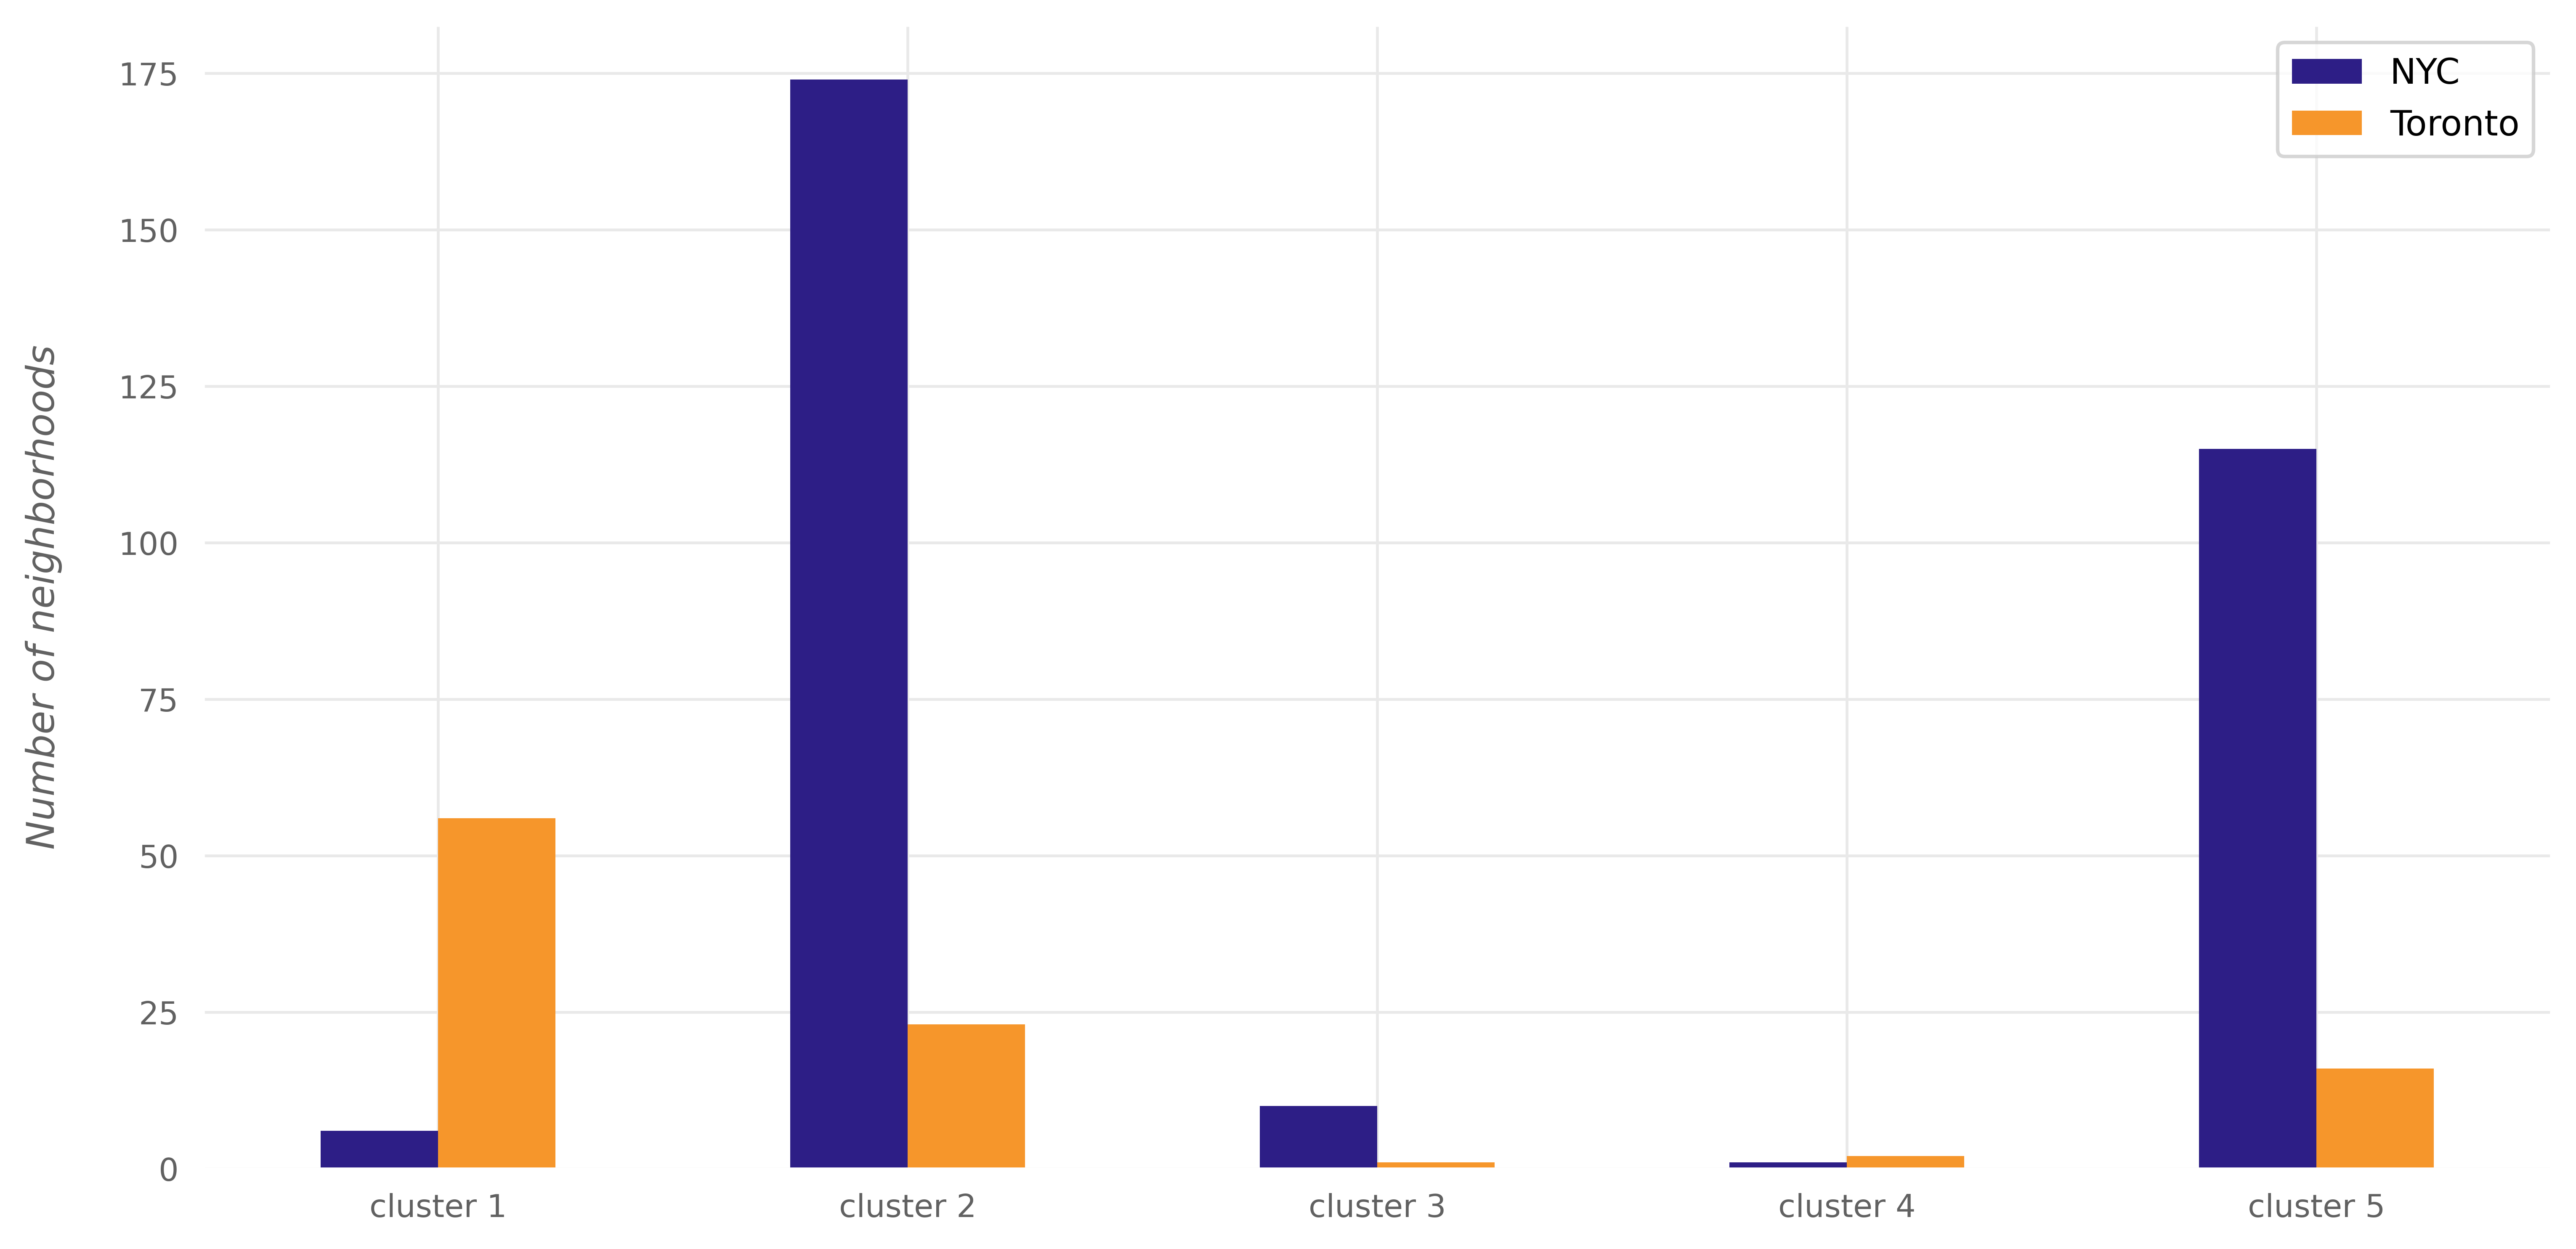

In [75]:
ind = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5']
city_c_df = pd.DataFrame({
    'NYC': [x[0] for x in n_counts],
    'Toronto': [x[1] for x in n_counts]
}, index = ind)

fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
city_c_df.plot(kind='bar', color=['#2d1e86', '#f6962b'], rot=0, ax=ax)
plot_conf(ax, xlbl='', ylbl='Number of neighborhoods', t='')
fig.savefig('city-count.png', dpi=300)

In [76]:
clust_cats = []
clusters = [c1, c2, c3, c4, c5]
for i, clus in enumerate(clusters):
    clust_cats.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            clust_cats[i].extend(list(ny_venues[ny_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            clust_cats[i].extend(list(toronto_venues[toronto_venues['Neighborhood'] == nn]['Venue Category'].values))
    clust_cats[i] = pd.Series(clust_cats[i]).value_counts(normalize=True) * 100

In [77]:
for i in range(kclusters):
    c__ = clust_cats[i].to_frame("% of venues")
    c__.index.names = ['Category']
    html = (c__.head(7).style.set_table_styles(styles)
            .set_table_attributes('style="border-collapse: collapse; border: 2px solid #BBBBBB"'))
    display(HTML(disp_fmt.format("Cluster {}".format(i+1))))
    display(html)

End of notebook